# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
# !pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

Для начала установлю `kaggle`.

In [4]:
# !pip3 install kaggle

In [5]:
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


Мы можем заметить, что он не смог найти json-файл. Переложу его куда надо (`/Users/vladkopchev/.kaggle`).

In [6]:
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


Все заработало! Теперь скачаю обучающую выборку. Как подсказывает название файла, она лежит в `train.zip`.

In [7]:
!kaggle competitions download -c nyc-taxi-trip-duration -f train.zip

train.zip: Skipping, found more recently modified local copy (use --force to force download)


Выгрузим файл с помощью встроеной функции (в описании датасета сказано, что в архие лежит csv-табличка)

In [8]:
data = pd.read_csv('train.zip')

In [9]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [10]:
data.drop(columns='dropoff_datetime', inplace=True)

In [11]:
data["pickup_datetime"] = data["pickup_datetime"].astype('datetime64')

Проверим корректность

In [12]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Получилось!

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

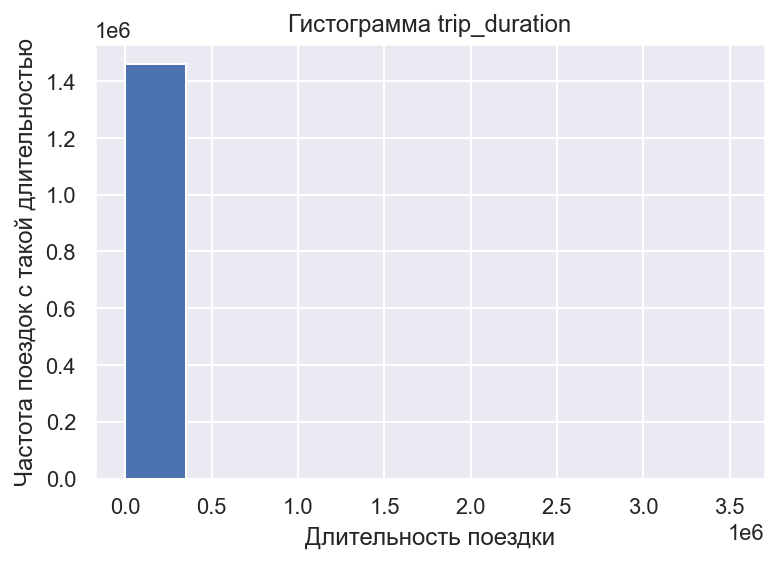

In [13]:
plt.hist(data["trip_duration"].values)
# plt.hist(data["trip_duration"].values, log=True, bins=3)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма trip_duration")
plt.xlabel("Длительность поездки")
plt.ylabel("Частота поездок с такой длительностью")

plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** поскольку гистограмма состоит только из одной палки, можно сказать, что в данных много выбросов.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** как было сказано в лекции 2, RMSE неустойчива к выбросам, которых, как видно из диаграммы, у нас много — в результате RMSE не позволит построить хорошую модель. При этом, как видно из физического смысла данных, логарифм целевой переменной и прогноза модели будет неотрицательным, если добавить к ним единицу (поскольку это позволяет избежать вырожденного случая, когда длительность поездки равна нулю), поэтому можно применить RMSLE. Мы доказали, что применить данную метрику возможно. Чем это будет полезно? Тем, что, как следует из все той же лекции, RMSLE будет штрафовать за сильные отклонения $\Rightarrow$ будет устойчива к выбросам. Помимо этого, она будет штрафовать и заниженные прогнозы (это тоже было в лекции 2), что логично в данной задаче — если клиент заказывает такси и модель рассчитала ему время меньше, чем поездка была на самом деле, то он может опоздать из-за этого, а если время получится больше — то ничего страшного не произойдет. В общем, данная метрика в этой задаче идеально подходит!

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: по определению, $MSE(X, y, \hat{a}) = \sum_{i=1}^{\ell} (\log (y_i+1) - \hat{a}(x_i))^2$. $RMSLE(X, y, a) = \sqrt{\sum_{i=1}^{\ell} (\log(y_i+1)-\log(\exp(\hat{a}(x_i))-1+1))^2} = \sqrt{\sum_{i=1}^{\ell} (\log(y_i+1) - \log(\exp(\hat{a}(x_i))))^2} = \sqrt{\sum_{i=1}^{\ell} (\log(y_i+1) - \hat{a}(x_i))^2} = \sqrt{MSE(X, y, \hat{a})}$

Очевидно, что, в силу монотонности квадратного корня, $MSE(X, y, a) \rightarrow \underset{a}{\min} \Leftrightarrow \sqrt{MSE(X, y, a)} \rightarrow \underset{a}{\min}$, чтд.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [14]:
data["log_trip_duration"] = np.log1p(data["trip_duration"])

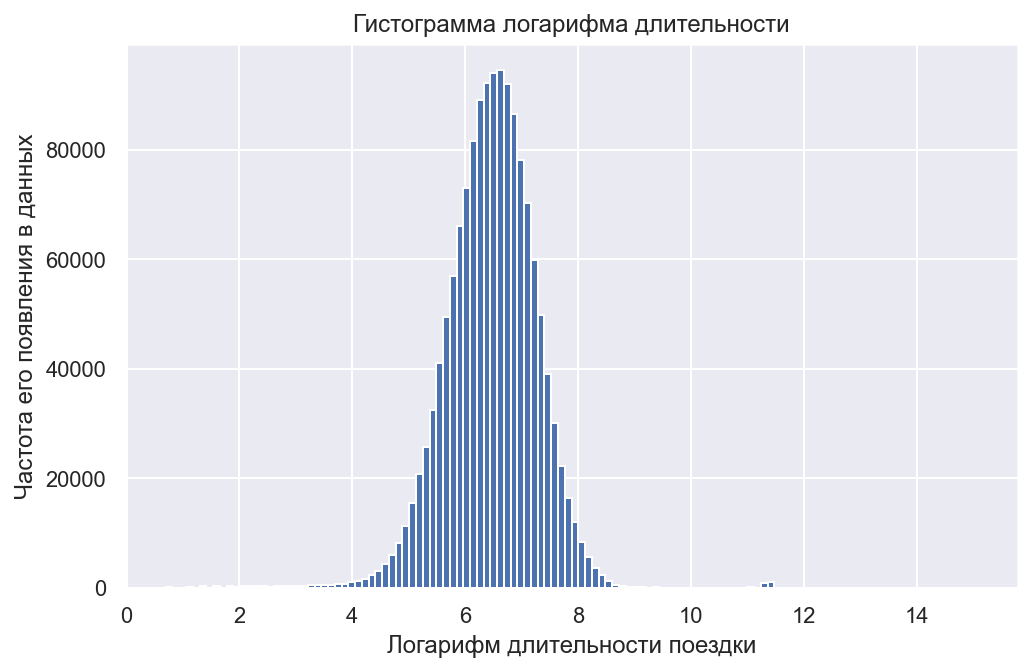

In [15]:
plt.hist(data["log_trip_duration"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма логарифма длительности")
plt.xlabel("Логарифм длительности поездки")
plt.ylabel("Частота его появления в данных")

plt.show()

Теперь удалим:

In [16]:
data.drop(columns="trip_duration", inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

**Решение.** Для этого вспомню, как мы делали это на втором семинаре.

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(data["log_trip_duration"], 
                   data["log_trip_duration"].mean() * np.ones(data["log_trip_duration"].shape),
                   squared=False)

0.7957592365411509

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Метод `date()` оставляет дату у `datetime`. Применим его ко всей выборке.

In [19]:
for_graph = data["pickup_datetime"].apply(lambda x: x.date())

In [20]:
for_graph

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: pickup_datetime, Length: 1458644, dtype: object

Построим график. Для того, чтобы он получился красивый, необходимо, во-первых, отсортировать значения в `sort_graph`, повернуть подписи на 90 градусов и оставить лишь [каждую 2 подпись](https://stackoverflow.com/questions/44521648/tick-frequency-when-using-seaborn-matplotlib-boxplot) (иначе они сольются), после чего подписать график и оси, а также позаботиться о размере графика.

/Users/vladkopchev/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


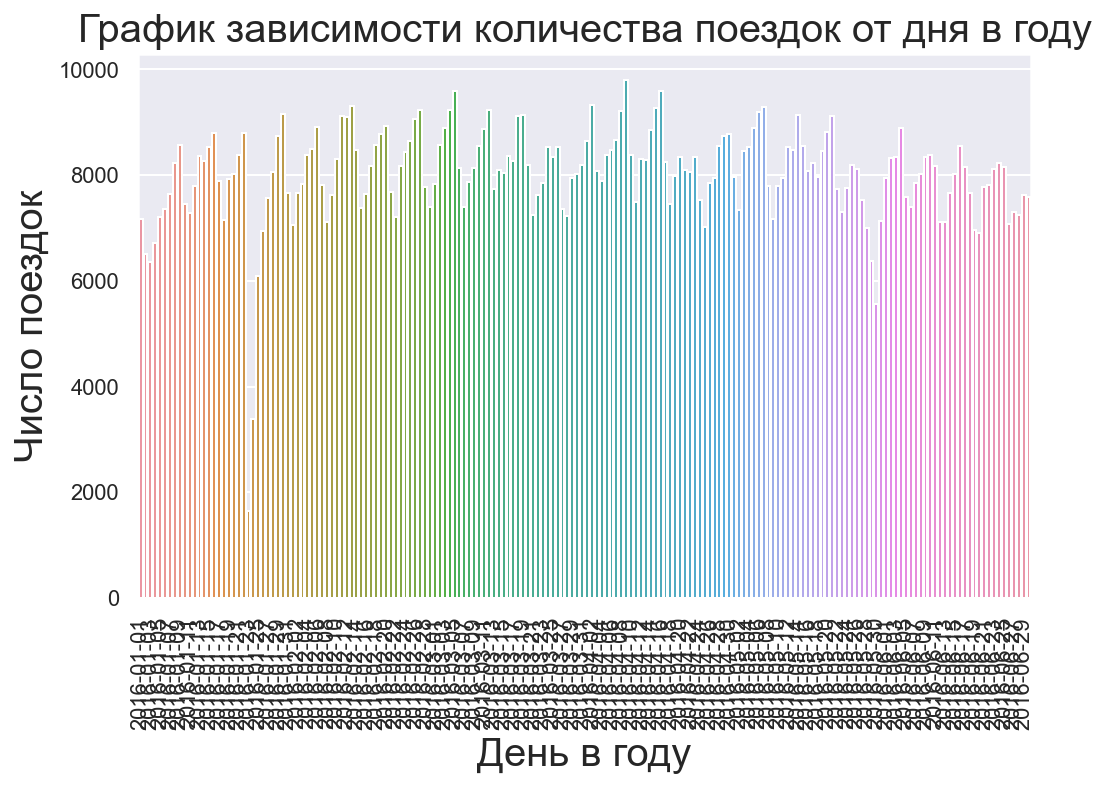

In [21]:
plt.xticks(rotation=90)  # rotate
p = sns.countplot(for_graph.sort_values())

plt.title("График зависимости количества поездок от дня в году", size=20)
plt.xlabel("День в году", size=20)
plt.ylabel("Число поездок", size=20)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 24, 8
sns.set_style("darkgrid")

import matplotlib.ticker as ticker
p.xaxis.set_major_locator(ticker.MultipleLocator(2))

Получилось отлично!

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ:** Первая аномалия произошла [2016-01-23](https://ria.ru/20160123/1364032228.html) и длилась до 2016-01-25, мы видим сильное снижение, по ссылке новость, которая, очевидно, на это повлияла — если власти запретили в какой-то момент автомобильное движение, то его с этого момента и не будет. Вторая аномалия произошла [2016-05-29](https://www.theguardian.com/us-news/2016/may/30/jfk-airport-new-york-flight-delays-terminal-7) и длилась до 2016-05-30 — в аэропорту JFK с 29 мая вплоть до приблизительно 30 мая 15:31, как видно из времени, указанного в статье, были отключены компьютеры, так что, видимо, люди не могли уехать из аэропорта на такси и по этой причине не вызывали его вплоть до этого времени.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

**Решение.** Для этого снова запихну нужные данные в `for_graph`, воспользовавшись функцией `weekday()`, которая возвращает день недели, а также `value_counts()`, которая возвращает количество. Для второго графика все то же самое, но воспользовавшись атрибутом `hour` для часов в сутках.

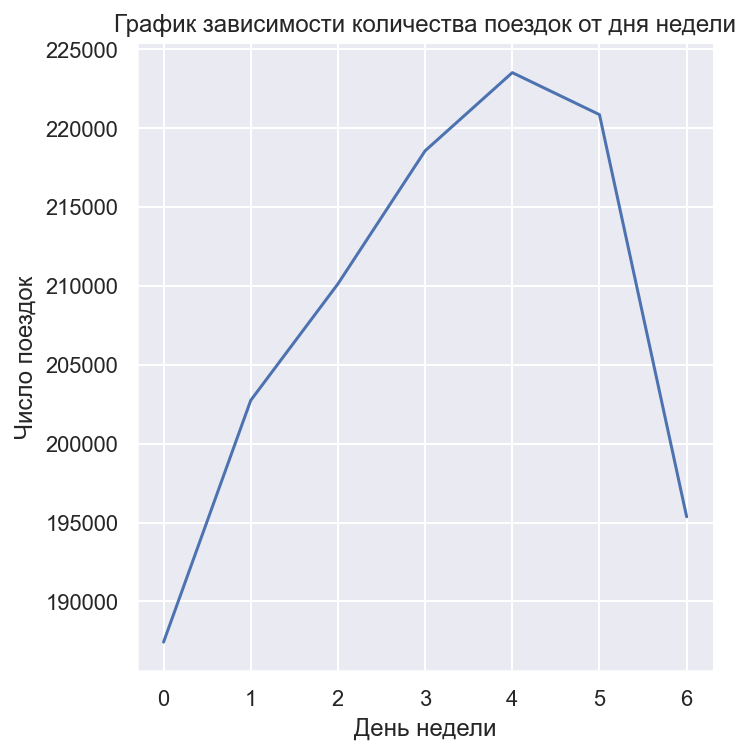

In [22]:
for_graph = data["pickup_datetime"].apply(lambda x: x.weekday()).value_counts()
sns.relplot(data=for_graph, kind='line')

plt.title("График зависимости количества поездок от дня недели")
plt.xlabel("День недели")
plt.ylabel("Число поездок")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 12, 8
sns.set_style("darkgrid")

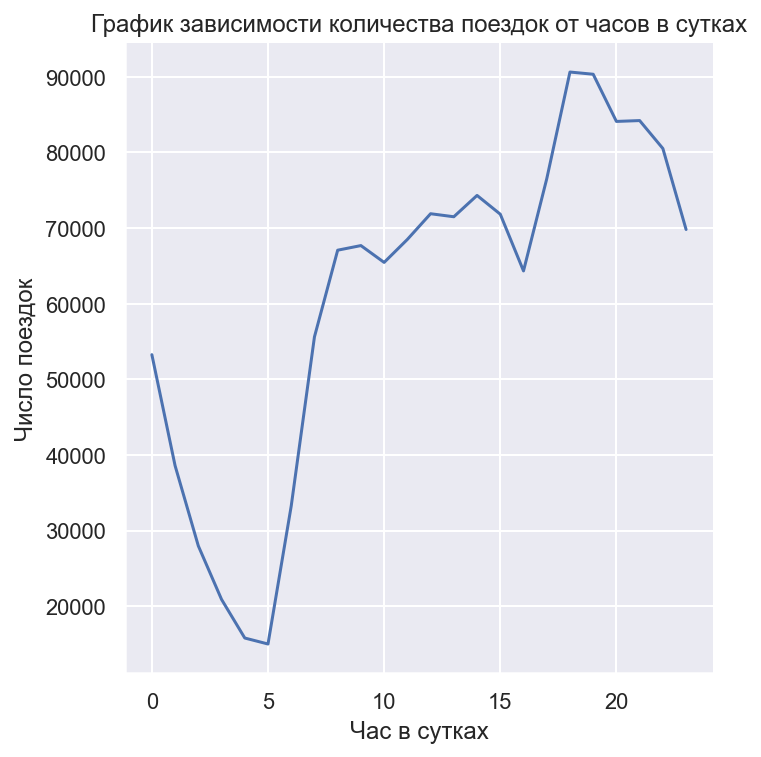

In [23]:
for_graph = data["pickup_datetime"].apply(lambda x: x.hour).value_counts()
sns.relplot(data=for_graph, kind='line')

plt.title("График зависимости количества поездок от часов в сутках")
plt.xlabel("Час в сутках")
plt.ylabel("Число поездок")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 12, 8
sns.set_style("darkgrid")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

**Решение.** Для этого я воспользуюсь атрибутами `hour`, `month`, создам дополнительные столбики в таблице `data` и запихну количества в `for_graph`.

In [24]:
data['hour'] = data["pickup_datetime"].apply(lambda x: x.hour)
data['month'] = data["pickup_datetime"].apply(lambda x: x.month)
for_graph = data[['month','hour']].value_counts()

Возникает проблема — согласно [документации](https://seaborn.pydata.org/generated/seaborn.relplot.html), необходимо сделать `for_graph` DataFrame'ом. Если использовать только `to_frame()`, то индексом `for_graph` будет являться мультииндекс — этого нам не надо, так что к `for_graph` придется применить еще и `reset_index()`. Получится безымянная колонка как раз с количеством поездок — к ней мы будем обращаться с помощью `for_graph[list(for_graph)[2]]`, поскольку по имени обратиться нельзя, зато `list(df)` даст список названий всех столбцов в DataFrame `df`, лучше я не придумал...

Для лучшей читабельности сделаю также [нормальную легенду.](https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions)

In [25]:
for_graph = for_graph.to_frame().reset_index()
trip_count = for_graph[list(for_graph)[2]]

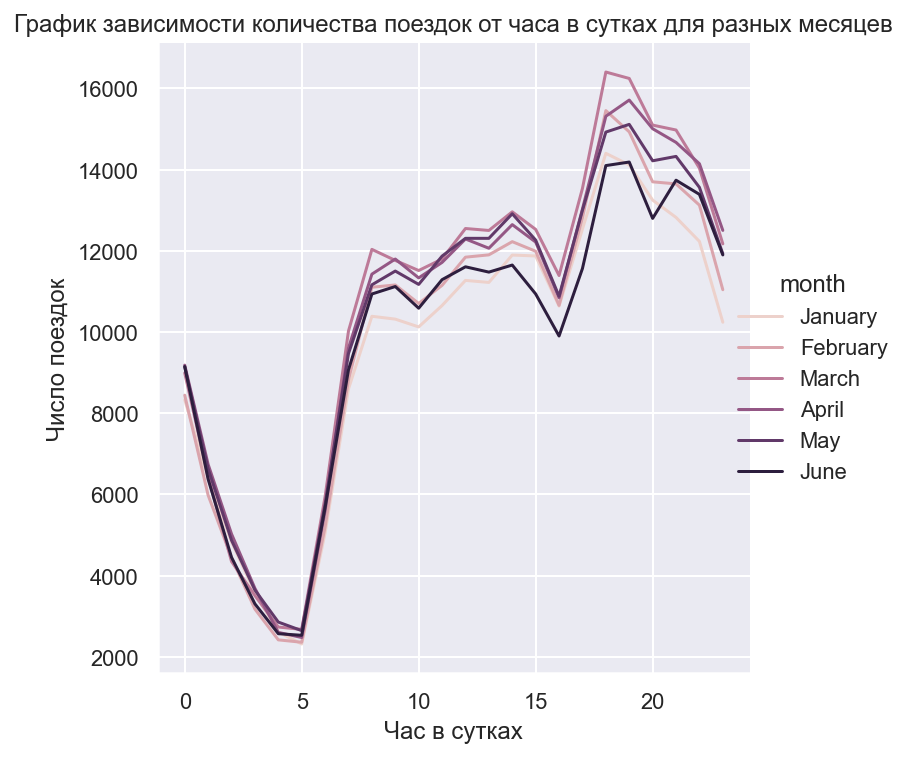

In [26]:
p = sns.relplot(data=for_graph, x='hour', y=trip_count, kind='line', hue='month');

plt.title("График зависимости количества поездок от часа в сутках для разных месяцев")
plt.xlabel("Час в сутках")
plt.ylabel("Число поездок")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 16, 8
sns.set_style("darkgrid")

new_labels = ['January', 'February', 'March', 'April', 'May', 'June']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)

Теперь построю второй график. Все мои действия будут аналогичны.

In [27]:
data['weekday'] = data["pickup_datetime"].apply(lambda x: x.weekday())
for_graph = data[['weekday','hour']].value_counts()

In [28]:
for_graph = for_graph.to_frame().reset_index()
trip_count = for_graph[list(for_graph)[2]]

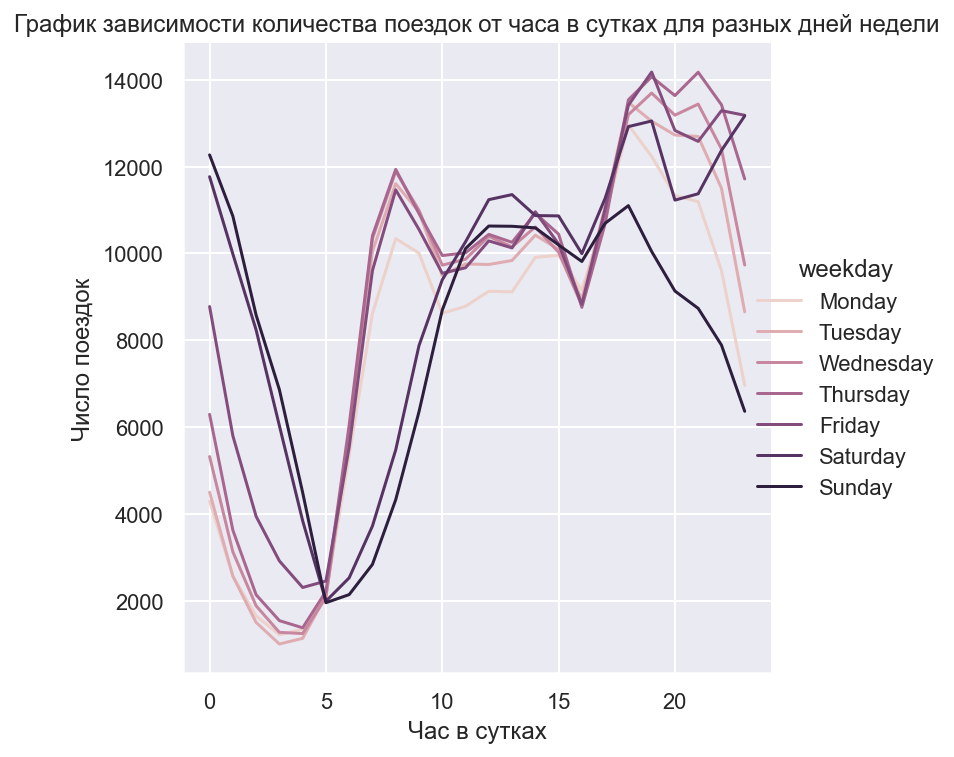

In [29]:
p = sns.relplot(data=for_graph, x='hour', y=trip_count, kind='line', hue='weekday');

plt.title("График зависимости количества поездок от часа в сутках для разных дней недели")
plt.xlabel("Час в сутках")
plt.ylabel("Число поездок")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 16, 8
sns.set_style("darkgrid")

new_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)

Что касается цветов, они явно не сливаются.

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ:**

Если говорить про первый график, до приблизительно 7 часов никакие дни недели не выделяются. Однако дальше, с марта по июнь, мы видим, что чем больше порядковый номер месяца, тем меньше поездок после 7 утра, притом кривые, соответствубщие разным месяцам, очень похожи — то есть, можно предположить, что с каждым месяцем число поездок на такси после 7 часов уменьшается приблизительно на некоторую константу. Я связываю это с тем, что именно с утра люди едут на работу/учебу и, чтобы успеть, им нужно вызвать такси. Однако с марта с каждым месяцем все теплее — поэтому после учебы/работы люди предпочитают дойти пешком, ведь это экономнее, при этом не так дискомфортно, как идти по холоду зимой. Что касается января и февраля, здесь обратная ситуация — в феврале больше поездок, чем в январе. Это так, поскольку в январе в каникулы многие люди никуда не ездят и не заказывают такси, а также потому что в феврале все же, напротив, холоднее, чем в январе — тут и завсиимость в температуре обратная. Опять же, кривые похожи, то есть, тут снова количество поездок уменьшается приблизительную на некоторую константу $\Rightarrow$ логчино предположить, $n$ людей, которым еще нормально было ходить пешком в январе, стали пользоваться такси в феврале, и количество поездок в феврале увеличилось на примерно $n \cdot k$ поездок, где $k$ — среднее количество поездок за февраль среди этих $n$ людей

Что касается второго графика, то с 0 до 5 часов графики похожи, разве что в выходные поездок побольше, чем в будни, поскольку, видимо, многие возвращаются домой после ночного веселья в пятницу и субботу — в будни все же хочется выспаться и в такое время находиться в кровати, а не в пути домой. При этом чем ближе к 5 утра, тем меньше количество поездок. В будни с 5 до 10 количество поездок резко увеличивается и возрастает на всем этом промежутке — понятное дело, люди едут на работу. В выходные с 5 до 12 тоже наблюдается рост, но не такой сильный, — видимо, люди спят и отдыхают после, собственно, ночного веселья. Примерно после 17 в воскресенье количество поездок монотонно убывает — люди хотят выспаться перед работой и не строят планов на такие поздние вечерние часы. Убывает количество поездок после 17 и в будни. В субботу же, наоборот, можно позволить себе не спать до поздна, так что тут количество поездок после 20 начинает возрастать.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

**Решение.** Вспомним, как мы делали это на семинаре.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train, test = train_test_split(data, test_size=0.3, random_state=10)

Нарисую теперь три графика. В `data["weekday"]` у нас уже были записаны дни недели. Осталось для каждой посчитать средний логарифм времени поездки. Сделаю это, посмотрев данный [гайд](https://pythonru.com/uroki/osnovy-pandas-2-agregacija-i-gruppirovka). В результате я группирую данные по `weekday` с помощью `mean()` и оставляю только нужный столбец — с логарифмом времени. Дальше воспользуюсь старым-добрым `relplot()`-ом.

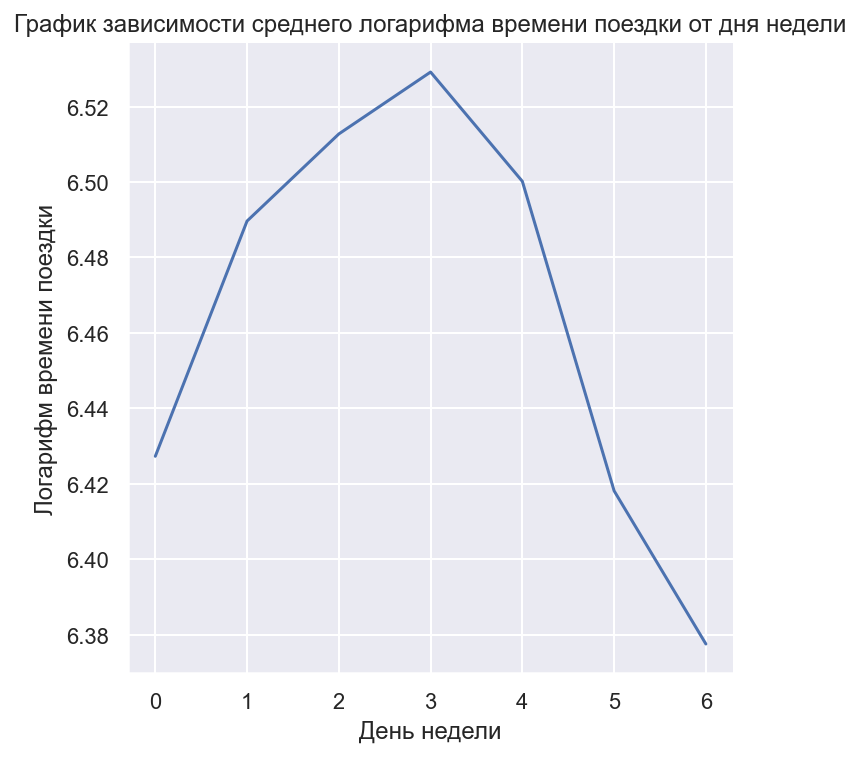

In [32]:
for_graph = train.groupby("weekday").mean()["log_trip_duration"]
p = sns.relplot(data=for_graph, kind='line');

plt.title("График зависимости среднего логарифма времени поездки от дня недели")
plt.xlabel("День недели")
plt.ylabel("Логарифм времени поездки")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 16, 8
sns.set_style("darkgrid")

Осталось еще два графика. Нарисую их, выполняя аналогичные действия. Вспомню, что день в году содержит атрибут `dayofyear`.

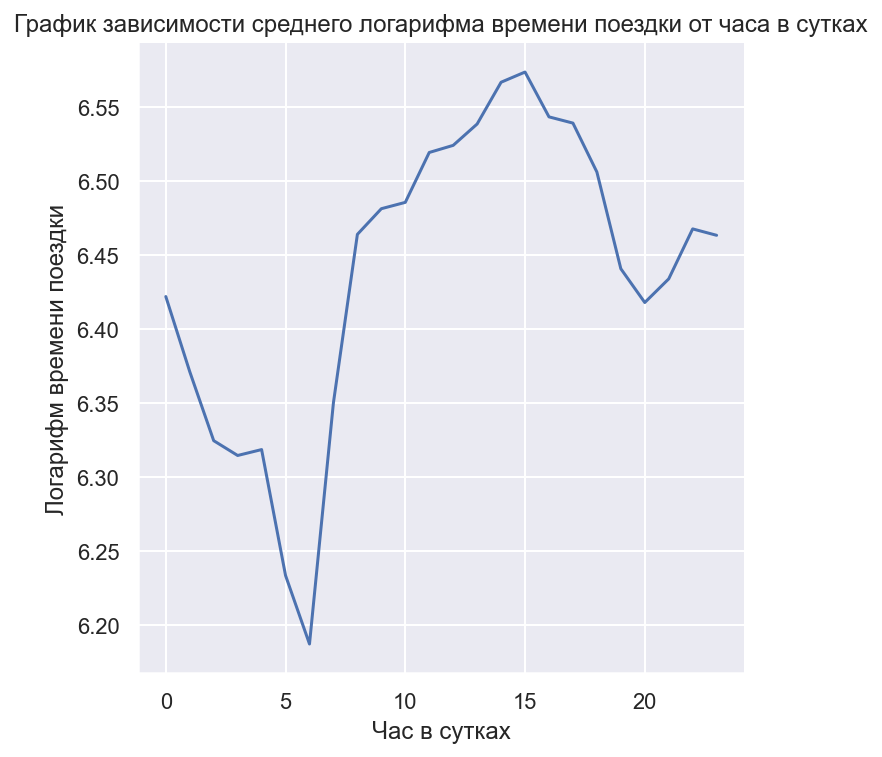

In [33]:
for_graph = train.groupby("hour").mean()["log_trip_duration"]
p = sns.relplot(data=for_graph, kind='line');

plt.title("График зависимости среднего логарифма времени поездки от часа в сутках")
plt.xlabel("Час в сутках")
plt.ylabel("Логарифм времени поездки")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 16, 8
sns.set_style("darkgrid")

In [34]:
train["dayofyear"] = train["pickup_datetime"].apply(lambda x: x.dayofyear)

<ipython-input-34-1035b726f251>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["dayofyear"] = train["pickup_datetime"].apply(lambda x: x.dayofyear)


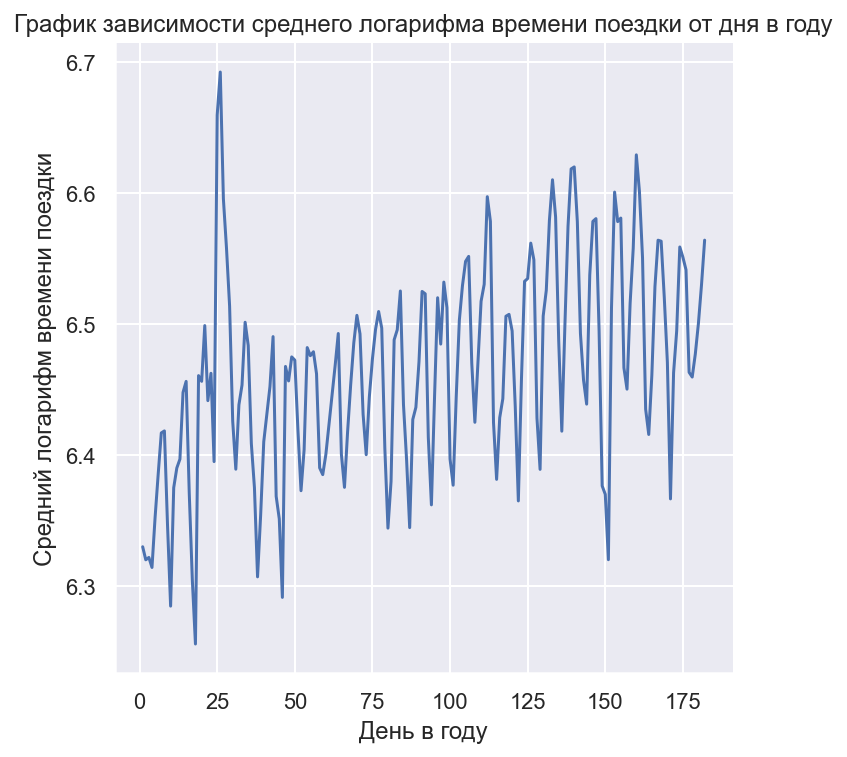

In [35]:
for_graph = train.groupby("dayofyear").mean()["log_trip_duration"]
p = sns.relplot(data=for_graph, kind='line');

plt.title("График зависимости среднего логарифма времени поездки от дня в году")
plt.xlabel("День в году")
plt.ylabel("Средний логарифм времени поездки")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 16, 8
sns.set_style("darkgrid")

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** да, похожи. Вероятно, это так, потому что разброс длины поездки вокруг средней длины для каждого дня недели и часа в сутках примерно один и тот же — для большинства людей поездки на такси рутинны — к примеру, если в будни люди ездят на такси на работу, то каждая эта поездка будет примерно одинаковой, поэтому большая часть поездок будет иметь длину, не сильно отличающуюся от средней. Таким образом, каждый новый вызов такси дает примерно одинаковую прибавку $k$ к длине поездок $\Rightarrow$ если число людей увеличилось на $n$, то средняя длина увеличилась на $n \cdot k$, отсюда и сходство графиков. Для ответа на вопрос про аномальные периоды, посмотрим на третий график. Мы видим, что около 25 дня и 150 дня есть сильные провалы – это и есть те аномальные периоды. То есть, когда число поездок аномально низкое, то и средний логарифм времени аномально низкий. Тренд наблюдаю. Средний логарифм меняется в некоторых пределах от очень низкого к очень высокому, повторяя это изменение с определенным периодом — как синусоида, только не такая гладкая. То же было заметно на графике количества поездок от дня в году. Все дело в том, что, как мы уже видели раннее, в выходные количество поездок меньше, чем в будни, поэтому в будни мы видим рост, в выходные падения, и так это и повторяется. Опять же, поскольку, по всей видимости, разброс длины поездки вокруг среднего небольшой, чем меньше поездок в данный день, тем меньше средняя длительность — отсюда этот тренд.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

**Решение.** В `train` большая часть признаков уже были добавлены ранее. Так что для `test` кода будет больше. Бинарный признак добавляется очень просто — с помощью проверки равенства даты объекта и даты аномалии. Первая аномалия произошла в январе, вторая — в мае, отсюда названия признаков.

In [36]:
test['weekday'] = test["pickup_datetime"].apply(lambda x: x.weekday())
test['month'] = test["pickup_datetime"].apply(lambda x: x.month)
test['hour'] = test["pickup_datetime"].apply(lambda x: x.hour)
test['dayofyear'] = test["pickup_datetime"].apply(lambda x: x.dayofyear)

train['jan_anomaly'] = train["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-01-23'), np.datetime64('2016-01-24'), np.datetime64('2016-01-25')])
train['may_anomaly'] = train["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-05-30'), np.datetime64('2016-05-29')])
test['jan_anomaly'] = test["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-01-23'), np.datetime64('2016-01-24'), np.datetime64('2016-01-25')])
test['may_anomaly'] = test["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-05-30'), np.datetime64('2016-05-29')])

<ipython-input-36-501cfbcc5d0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['weekday'] = test["pickup_datetime"].apply(lambda x: x.weekday())
<ipython-input-36-501cfbcc5d0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] = test["pickup_datetime"].apply(lambda x: x.month)
<ipython-input-36-501cfbcc5d0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [37]:
data['weekday'] = data["pickup_datetime"].apply(lambda x: x.weekday())
data['month'] = data["pickup_datetime"].apply(lambda x: x.month)
data['hour'] = data["pickup_datetime"].apply(lambda x: x.hour)
data['dayofyear'] = data["pickup_datetime"].apply(lambda x: x.dayofyear)

In [38]:
data['jan_anomaly'] = data["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-01-23'), np.datetime64('2016-01-24'), np.datetime64('2016-01-25')])
data['may_anomaly'] = data["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-05-30'), np.datetime64('2016-05-29')])
data['jan_anomaly'] = data["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-01-23'), np.datetime64('2016-01-24'), np.datetime64('2016-01-25')])
data['may_anomaly'] = data["pickup_datetime"].apply(lambda x: x.date() in [np.datetime64('2016-05-30'), np.datetime64('2016-05-29')])

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:** 

- День недели: категориальный. Действительно, построенные выше графики исчерпывающе объяснили, что в каждый день недели данного месяца люди ведут себя примерно одинаково, поэтому целевая переменная в каждую, скажем, субботу данного месяца будет иметь примерно одинаковые знаечения. Представим, что мы можем считать день недели вещественной переменной и работать с ней без предварительного применения дополнительных средств, вроде one-hot кодирования. Тогда модель вне зависимости от значения прочих признаков каждую субботу будет выдавать примерно один и то же значение. В результате модель слабо будет отличаться от константной и особого смысла в ней не будет.
- Месяц: по тем же причинам является категориальным признаком.
- Час: категориальный по тем же причинам.
- Аномальность: это и так бинарный признак, который нужен скорее чтобы скорректировать данные на аномальных значениях, чем чтобы отразить какую-то реальную закономерность в данных — этот признак не дает никакой информации о днях, в которых аномалий не происходит
- Номер дня в году: можно считать вещественным, поскольку здесь нет такого, что на одном и том же дне в году модель будет выдавать похожий результат — данный признак отражает реальную закономерность в данных и его использование не ухудшит качество модели.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

**Решение.** Вспомним семинар. Для начала создадим две новые таблички `X_train`, `X_test`, которые содержат `train` и `test` без запрещенных признаков и целевой переменной, а также две `Series` с целевой переменной. Заметим, что среди признаков, которые можно использовать в задании, нет `log_trip_duration`, поэтому не надо дополнительно отделять целевую переменную от данных.

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [40]:
X_train = train[['weekday', 'month', 'hour', 'dayofyear', 'jan_anomaly', 'may_anomaly']]
y_train = train["log_trip_duration"]

X_test = test[['weekday', 'month', 'hour', 'dayofyear', 'jan_anomaly', 'may_anomaly']]
y_test = test["log_trip_duration"]

Для выполнения задания буду использовать пайплайн, уже написанный на семинаре, предварительно выделив категориальные и числовые значения. Не буду one-hot кодировать бинарные признаки в силу [данных](https://stackoverflow.com/questions/43515877/should-binary-features-be-one-hot-encoded) причин, поэтому не буду включать 'jan_anomaly' и 'may_amomaly' в список 'categorical_features'.

In [41]:
numeric_features = ['dayofyear']
categorical_features = ['weekday', 'month', 'hour']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7875


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [42]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [43]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [44]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ:** JFK Airport и Port Newark расположены достаточно далеко от основной массы точек и поэтому сильно выделяются.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

**Решение.** Воспользуюсь функцией с семинара.

In [45]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [46]:
data['haversine'] = haversine_array(data['pickup_latitude'].values, data['pickup_longitude'].values, 
                                    data['dropoff_latitude'].values, data['dropoff_longitude'].values)

Все получилось:

In [47]:
data.sample(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,hour,month,weekday,dayofyear,jan_anomaly,may_anomaly,haversine
1342042,id1926469,2,2016-05-16 17:00:20,1,-73.969299,40.785446,-73.976547,40.782478,N,5.749393,17,5,0,137,False,False,0.693752
1320737,id1864388,2,2016-06-04 17:51:00,1,-73.979813,40.745762,-73.987503,40.721676,N,6.720220,17,6,5,156,False,False,2.755513


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [48]:
data["log_haversine"] = np.log1p(data['haversine'])
data.sample(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,hour,month,weekday,dayofyear,jan_anomaly,may_anomaly,haversine,log_haversine
1428915,id2266057,1,2016-03-07 18:32:37,1,-73.966743,40.789017,-73.970367,40.784145,N,5.049856,18,3,0,67,False,False,0.621689,0.483468
837140,id2891830,2,2016-03-30 20:13:07,1,-74.005157,40.740910,-73.963074,40.761822,N,7.153052,20,3,2,90,False,False,4.239555,1.656237


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [49]:
correlations = data[["haversine", "log_haversine"]].corrwith(data["log_trip_duration"])
correlations

haversine        0.573595
log_haversine    0.749882
dtype: float64

Для этого я воспользовался функцией `corrwith()`, которую показали на семинаре. Чем выше коэффициент корреляции между признаками, тем лучше признаки коррелируют. Здесь мы видим, что у `log_haversine` коэффициент корреляции с таргетом выше, чтд.

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [50]:
data["avg_speed"] = data["log_haversine"] / data["log_trip_duration"]

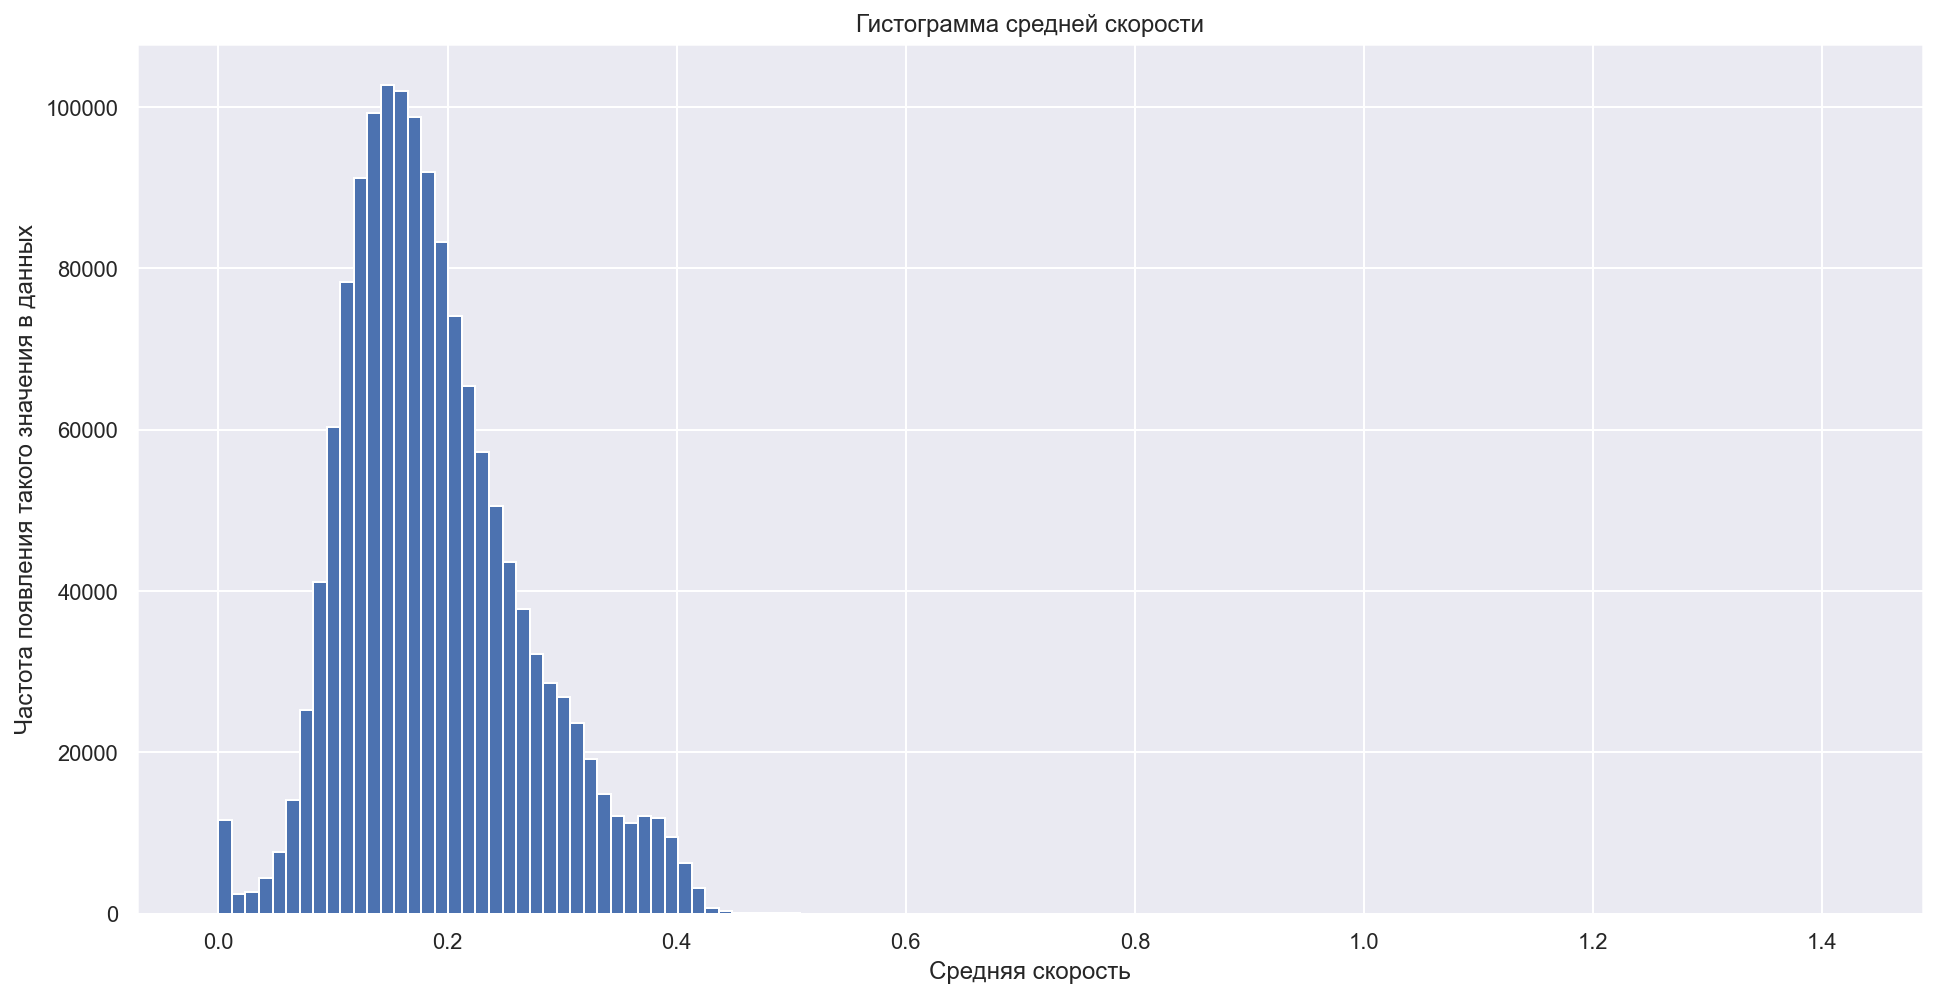

In [51]:
plt.hist(data["avg_speed"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма средней скорости")
plt.xlabel("Средняя скорость")
plt.ylabel("Частота появления такого значения в данных")

plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

**Решение.** Выбросим примеры, остаток у которых больше 0.95-квантили.

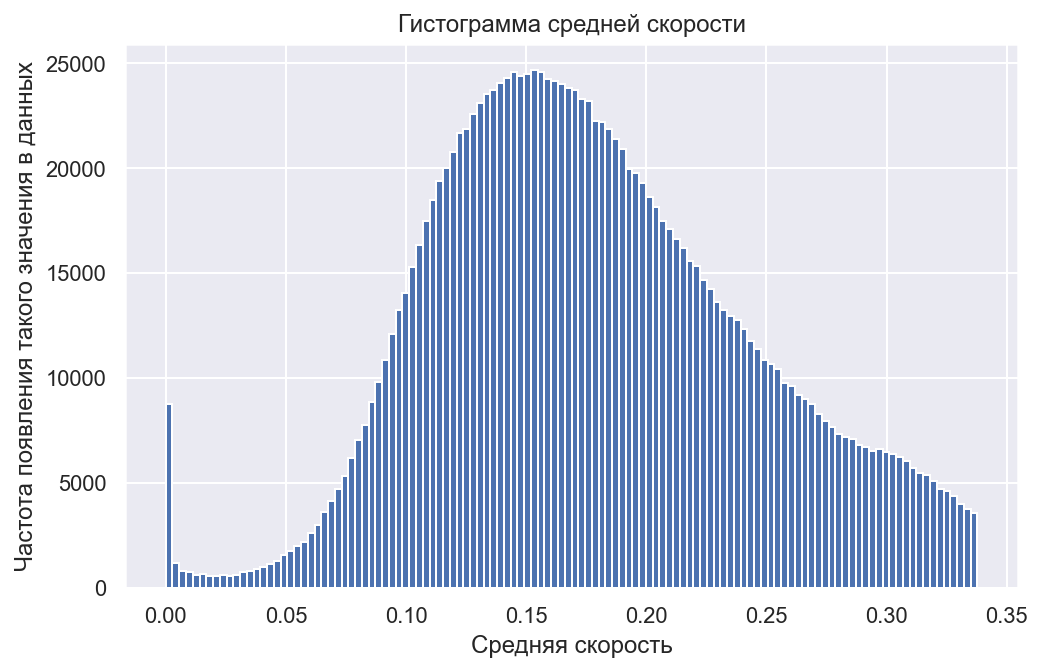

In [52]:
mask = (data["avg_speed"] < np.quantile(data["avg_speed"], 0.95))
plt.hist(data.loc[mask]["avg_speed"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма средней скорости")
plt.xlabel("Средняя скорость")
plt.ylabel("Частота появления такого значения в данных")

plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

**Решение.** Снова воспользуемся `groupby()`, а также [pivot](https://datavizpyr.com/heatmaps-with-seaborn-in-python/).

In [53]:
for_graph = data.groupby(["weekday", "hour"]).median()["avg_speed"]
for_graph = for_graph.to_frame().reset_index()

In [54]:
for_graph.sample(2)

,weekday,hour,avg_speed
30,1,6,0.190358
159,6,15,0.177789


In [55]:
for_graph = pd.pivot_table(for_graph, values='avg_speed', index=['weekday'], columns='hour')
for_graph

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,0.224231,0.222168,0.218759,0.228093,0.247414,0.226183,0.194528,0.179878,0.166122,0.161767,...,0.164878,0.165863,0.166330,0.167349,0.169300,0.174538,0.188069,0.195236,0.198644,0.211756
1,0.214900,0.219897,0.218783,0.227828,0.243195,0.208151,0.190358,0.174211,0.158955,0.155831,...,0.158790,0.157082,0.161295,0.164583,0.164650,0.171355,0.184147,0.192437,0.200113,0.206155
2,0.212216,0.215199,0.215115,0.224937,0.238672,0.211171,0.189700,0.175189,0.161061,0.155779,...,0.157674,0.157620,0.162438,0.165011,0.164369,0.169198,0.182416,0.191885,0.195498,0.203876
3,0.208145,0.214215,0.219201,0.223658,0.236890,0.215453,0.190116,0.174986,0.160498,0.158246,...,0.159549,0.158706,0.162602,0.164136,0.165099,0.170625,0.181747,0.188898,0.193475,0.200355
4,0.205591,0.206135,0.206929,0.214090,0.235077,0.225965,0.193204,0.175994,0.162657,0.158142,...,0.163997,0.163608,0.167406,0.165979,0.166095,0.167726,0.175059,0.180274,0.184672,0.190715
5,0.193577,0.198980,0.199172,0.207088,0.219014,0.238336,0.218631,0.198197,0.185427,0.178016,...,0.170849,0.171812,0.173200,0.174822,0.169419,0.168710,0.172585,0.176998,0.180158,0.188260
6,0.192410,0.197055,0.200512,0.207261,0.214696,0.238441,0.235396,0.206503,0.188434,0.182983,...,0.178136,0.177789,0.180358,0.179941,0.179510,0.179655,0.186173,0.192390,0.201025,0.211118


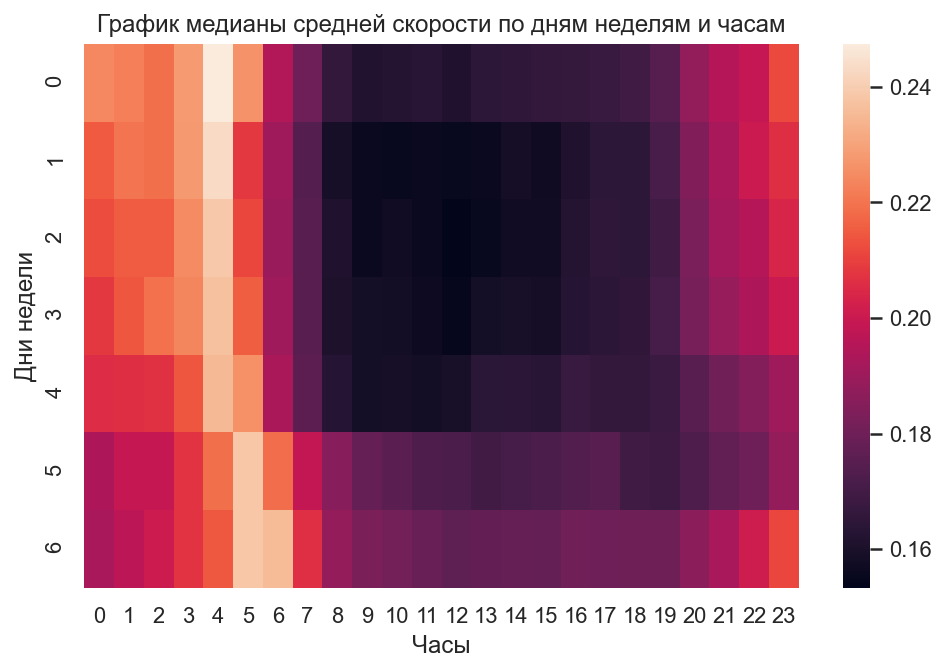

In [56]:
sns.heatmap(for_graph)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("График медианы средней скорости по дням неделям и часам")
plt.ylabel("Дни недели")
plt.xlabel("Часы")

plt.show()

Не забудьте удалить колонку со значением скорости из данных!

In [57]:
data.drop(columns="avg_speed", inplace=True)

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: поскольку признак `avg_speed` будет сильно [коррелировать](https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e) с признаком `log_haversine`

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ:** наиболее светлый участок — в понедельник в 4 часа утра $\Rightarrow$ в этот момент времени скорость максимальна. Самый темный — в среду в 12 часов утра $\Rightarrow$ в этот период скорость минимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

**Решение.** Мы уже нашли зависимость между скоростью и днями недели с часами. Положим, условно говоря, что, если скорость >= 0.22, то, очевидно, дороги свободны (поскольку средняя скорость соответствует скорее средней загруженности дорог). Аналогично, скорость <= 0.18 говорит о сильной загруженности дорог.

Мы видим большой темный прямоугольник на heatmap: от 8 до 15 по часам и от 4 до 1 по дням. Это прямоугольник сильной загруженности (`high_traffic`). Наоборот, прямоугольник от 0 до 6 по часам и 0 до 6 по дням — прямоугольник слабой загруженности (`low_traffic`). Области со средними значениями в расчет не берем.

Итак, признаки придуманы. Добавим их в табличку. Для этого присвоим сначала всем `False`, а потом попадающим в указанные прямоугольники `True`.

In [58]:
data["high_traffic"] = False
true_vals = data[(data["hour"] <= 15) & (data["hour"] >= 8) & (data["weekday"] >= 1) & (data["weekday"] <= 4)].index
data.loc[true_vals, 'high_traffic'] = True

In [59]:
data["low_traffic"] = False
true_vals = data[(data["hour"] <= 6) & (data["hour"] >= 0) & (data["weekday"] >= 0) & (data["weekday"] <= 6)].index
data.loc[true_vals, 'low_traffic'] = True

In [60]:
data.sample(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,hour,month,weekday,dayofyear,jan_anomaly,may_anomaly,haversine,log_haversine,high_traffic,low_traffic
1030437,id1949921,1,2016-06-05 19:22:48,1,-73.996544,40.716949,-73.996567,40.716999,Y,2.302585,19,6,6,157,False,False,0.005842,0.005825,False,False
961802,id1820119,2,2016-05-04 22:10:30,5,-73.998070,40.737949,-73.915634,40.764507,N,7.499977,22,5,2,125,False,False,7.545887,2.145450,False,False


Все получилось!

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

**Решение.** Мы выделили JFK Airport и Port Newark. Чтобы создать признаки, отвечающие на вопрос из условия, найдем координаты этих двух мест в интернете. Точнее, зайду на сайт OpenStreetMap и с помощью кнопки Show Address получу координаты, задающие прямоугольник, в котором находятся эти два мест.

In [61]:
data["jfk_started"] = False
true_vals = data[(data["pickup_latitude"] >= 40.6409) & (data["pickup_latitude"] <= 40.6492) & (data["pickup_longitude"] >= -73.7926) & ((data["pickup_longitude"] <= -73.7784))].index
data.loc[true_vals, "jfk_started"] = True

data["newark_started"] = False
true_vals = data[(data["pickup_latitude"] >= 40.6633) & (data["pickup_latitude"] <= 40.7146) & (data["pickup_longitude"] >= -74.2046) & ((data["pickup_longitude"] <= -74.1411))].index
data.loc[true_vals, "newark_started"] = True

data["jfk_ended"] = False
true_vals = data[(data["dropoff_latitude"] >= 40.6409) & (data["dropoff_latitude"] <= 40.6492) & (data["dropoff_longitude"] >= -73.7926) & ((data["dropoff_longitude"] <= -73.7784))].index
data.loc[true_vals, "jfk_ended"] = True
true_vals

data["newark_ended"] = False
true_vals = data[(data["dropoff_latitude"] >= 40.6633) & (data["dropoff_latitude"] <= 40.7146) & (data["dropoff_longitude"] >= -74.2046) & ((data["dropoff_longitude"] <= -74.1411))].index
data.loc[true_vals, "newark_ended"] = True

In [62]:
data[data["newark_ended"] == True].sample(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,jan_anomaly,may_anomaly,haversine,log_haversine,high_traffic,low_traffic,jfk_started,newark_started,jfk_ended,newark_ended
708131,id2767576,2,2016-02-15 09:45:05,1,-73.991379,40.749828,-74.177513,40.69054,N,7.396335,...,False,False,17.015507,2.891233,False,False,False,False,False,True
352545,id0142152,1,2016-02-07 15:11:33,2,-74.008713,40.739449,-74.177071,40.69495,N,7.417580,...,False,False,15.027004,2.774275,False,False,False,False,False,True


Сработало!

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

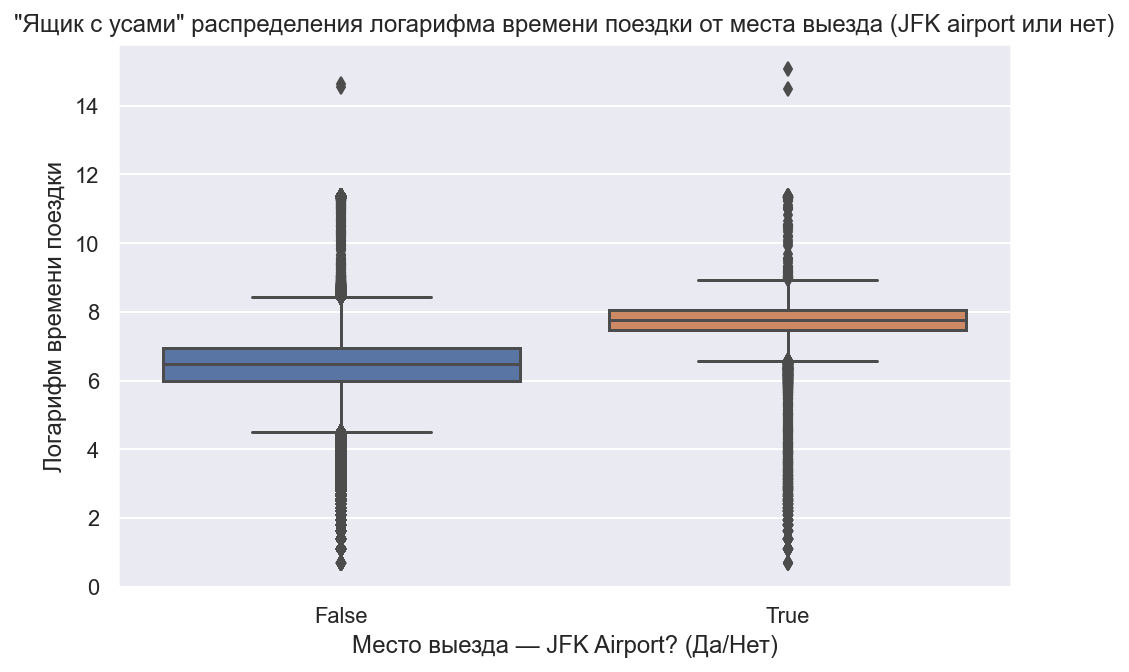

In [63]:
sns.boxplot(x="jfk_started", y="log_trip_duration", data=data)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title('"Ящик с усами" распределения логарифма времени поездки от места выезда (JFK airport или нет)')
plt.ylabel("Логарифм времени поездки")
plt.xlabel("Место выезда — JFK Airport? (Да/Нет)")

plt.show()

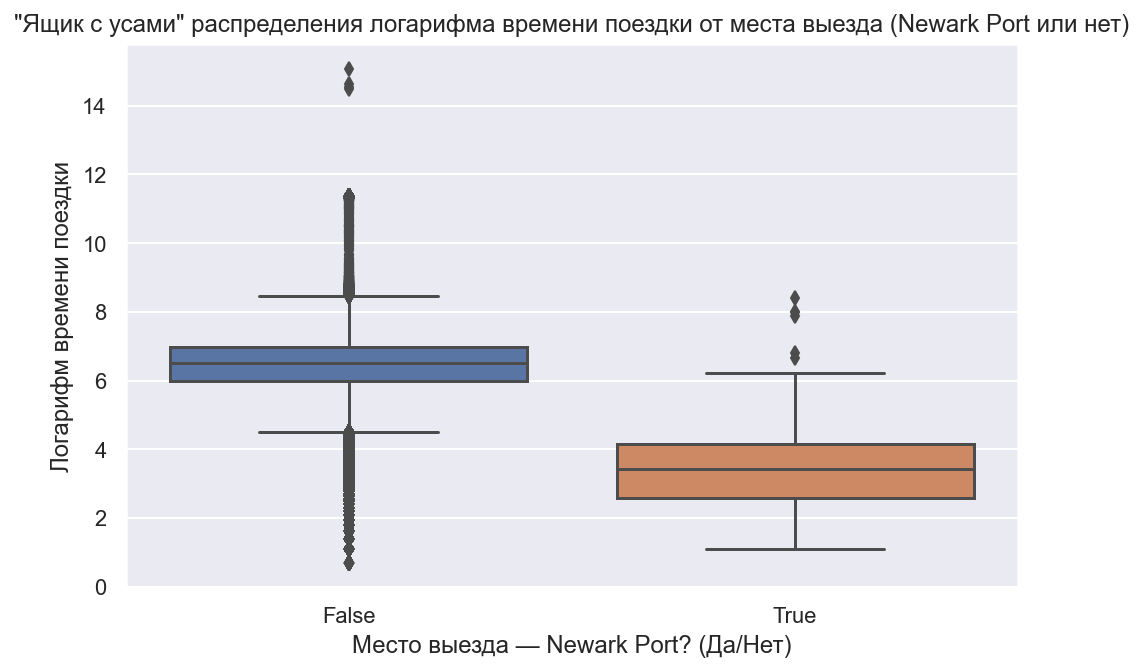

In [64]:
sns.boxplot(x="newark_started", y="log_trip_duration", data=data)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title('"Ящик с усами" распределения логарифма времени поездки от места выезда (Newark Port или нет)')
plt.ylabel("Логарифм времени поездки")
plt.xlabel("Место выезда — Newark Port? (Да/Нет)")

plt.show()

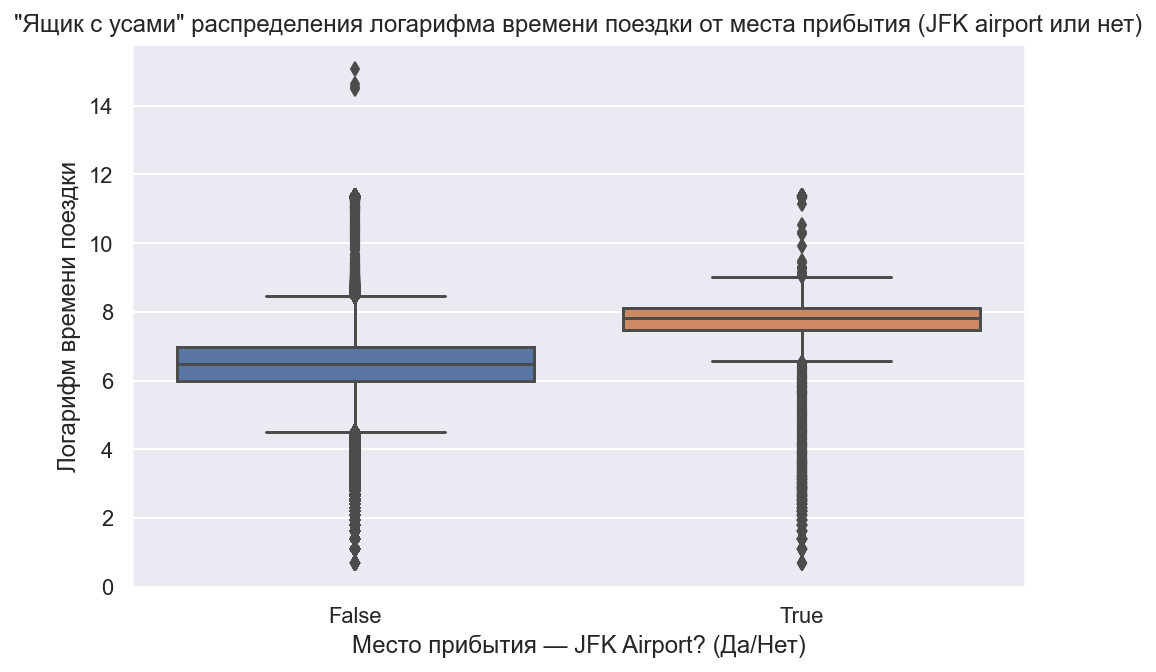

In [65]:
sns.boxplot(x="jfk_ended", y="log_trip_duration", data=data)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title('"Ящик с усами" распределения логарифма времени поездки от места прибытия (JFK airport или нет)')
plt.ylabel("Логарифм времени поездки")
plt.xlabel("Место прибытия — JFK Airport? (Да/Нет)")

plt.show()

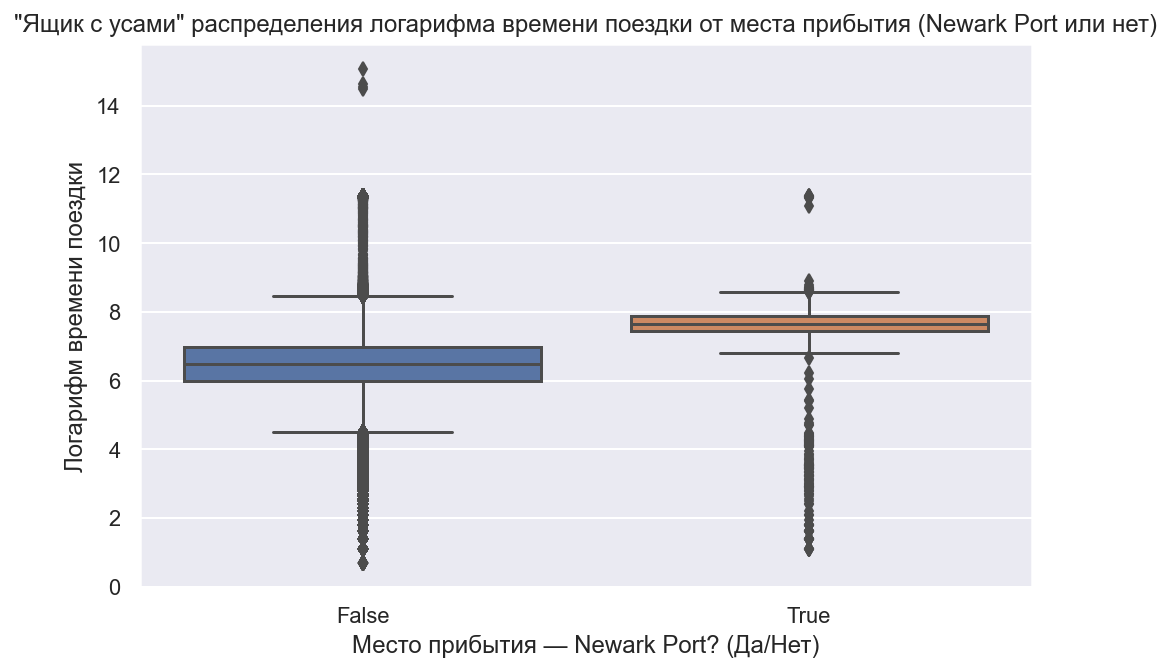

In [66]:
sns.boxplot(x="newark_ended", y="log_trip_duration", data=data)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title('"Ящик с усами" распределения логарифма времени поездки от места прибытия (Newark Port или нет)')
plt.ylabel("Логарифм времени поездки")
plt.xlabel("Место прибытия — Newark Port? (Да/Нет)")

plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ:** рассмотрим 4 графика.

1. Мы видим, что на правом графике значений с аномально низким временем поездки гораздо больше, при этом слева выбросы расположены симметрично — получается, введя этот признак, нам удалось немного скорректироать данные и, таким образом, если `jfk_started == True` для некоторого объекта, то мы можем знать, что вероятность того, что значение целевой переменной на нем, является аномально низким, высока! Признак получился удачным.

2. Здесь на правом графике мы видим обратную ситуацию — выбросов почти нет, очень много данных расположены между $Q_1$ и $Q_3$-квартилями. Таким образом, если `newark_started == True` на данном объекте, то, скорее всего, целевая перменная на нем будет примерно равна среднему логарифму значений. Снова, признак позволяет получить больше информации о данных и улучшить нашу модель, он был выделен удачно.

3–4. На этих графиках мы видим примерно одинаковую ситуацию: срава аномально низких значений больше, слева аномально высоких и аномально низких примерно поровну. И эти признаки тоже были выделены, по моему мнению, удачно, поскольку позволяют узнать больше информации о данных  и это можно использовать аналогично тому, как мы бы использовали 1–2.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

Посмотрю, как это уже решали на [StackOverflow](https://ru.stackoverflow.com/questions/1161594/Разбиение-области-на-ячейки-и-присвоение-меток-с-началом-и-концом%3C/span%3E).

In [67]:
#!pip install ipyleaflet

Предварительно добавлю данные признаки.

In [69]:
data["start_circle"] = 0.
data["end_circle"] = 0.

In [70]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles, Polygon, CircleMarker, LayerGroup

from scipy.spatial.distance import cdist

COL_NAMES = dict(
    pick_lat="pickup_latitude",
    pick_lon="pickup_longitude",
    drop_lat="dropoff_latitude",
    drop_lon="dropoff_longitude"
)

class MapGridTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, loc, col, row, col_names=COL_NAMES):
        self.location_mh = loc
        self.col = col
        self.row = row
        self.col_names = col_names
        self.pick_lat = col_names["pick_lat"]
        self.pick_lon = col_names["pick_lon"]
        self.drop_lat = col_names["drop_lat"]
        self.drop_lon = col_names["drop_lon"]
        self.lat_min, self.lat_max = loc[:, 0].min(), loc[:, 0].max()
        self.lon_min, self.lon_max = loc[:, 1].min(), loc[:, 1].max()

    def create_box_(self, loc):
        polygon_loc = [
                    [(loc[0] - self.walls[0] / 2), loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] + self.walls[1] / 2],
                    [loc[0] - self.walls[0] / 2, loc[1] + self.walls[1] / 2]
                  ]
        return polygon_loc

    def show_map(self):
        self.walls, self.circles_loc = self._fit()
        _map = Map(center=((self.location_mh[:, 0]).mean(), (self.location_mh[:, 1]).mean()),
                   zoom=11, basemap=basemaps.Esri.NatGeoWorldMap)

        circles = [(CircleMarker(location=(lat, long), fill_color='red',
                                 fill_opacity=1, radius=5, stroke=False)) for lat, long in self.circles_loc]
        polygons = [(Polygon(locations=self.create_box_(loc), fill_opacity=0)) for loc in self.circles_loc]

        circles_layer = LayerGroup(layers=circles)
        polygon_layer = LayerGroup(layers=polygons)

        _map.add_layer(circles_layer)
        _map.add_layer(polygon_layer)

        return _map

    def _fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, \
              (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]

        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), \
                               (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) \
                            for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

        return self.walls, self.circles_loc


    def get_sector_idx(self, X):
        pickup_idx = cdist(X.loc[:, [self.pick_lat, self.pick_lon]],
                           a.circles_loc).argmin(axis=1)
        dropoff_idx = cdist(X.loc[:, [self.drop_lat, self.drop_lon]],
                            a.circles_loc).argmin(axis=1)
        qry = f"@self.lat_min <= {self.pick_lat} <= @self.lat_max \
               and @self.lon_min <= {self.pick_lon} <= @self.lon_max"
        pickup_valid = X.eval(qry).to_numpy()
        pickup_idx[~pickup_valid] = -1
        qry = f"@self.lat_min <= {self.drop_lat} <= @self.lat_max \
               and @self.lon_min <= {self.drop_lon} <= @self.lon_max"
        dropoff_valid = X.eval(qry).to_numpy()
        dropoff_idx[~dropoff_valid] = -1
        return pickup_idx, dropoff_idx

    def transform(self, X):
        return (X,) + self.get_sector_idx(X)
    
    def _transform(self, X):
        _, self.circles_loc = self._fit()
        circles_dict = {ind:loc for ind, loc in enumerate(self.circles_loc)}
        X['start_circle'] = ((X['pickup_latitude'] > self.circles_loc[:, 0].min()) & (X['pickup_latitude'] < self.circles_loc[:, 0].max()) & \
                             (X['pickup_longitude'] > self.circles_loc[:, 1].min()) & (X['pickup_longitude'] < self.circles_loc[:, 1].max())).map({True: 0, False : -1})
        X['end_circle'] = ((X['dropoff_latitude'] > self.circles_loc[:, 0].min()) & (X['dropoff_latitude'] < self.circles_loc[:, 0].max()) & \
                     (X['dropoff_longitude'] > self.circles_loc[:, 1].min()) & (X['dropoff_longitude'] < self.circles_loc[:, 1].max())).map({True: 0, False : -1})
        for index in X.index:
            row = X.loc[index, ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude','dropoff_longitude']]
            for key, value in circles_dict.items():
                box = np.array(self.create_box_(value))
                if ((box[:, 0].min() < row[0]) & (row[0] < box[:, 0].max())) & \
                    ((box[:, 1].min() < row[1]) & (row[1] < box[:, 1].max())):
                    X.loc[index, 'start_circle'] = key
                if ((box[:, 0].min() < row[2]) & (row[2] < box[:, 0].max())) & \
                    ((box[:, 1].min() < row[3]) & (row[3] < box[:, 1].max())): 
                    X.loc[index, 'end_circle'] = key

        return X

In [71]:
mh = np.array([
              [40.703314, -74.018608],
              [40.703314, -73.934241],
              [40.791438, -73.934241],
              [40.791438, -74.018608]
               ])
a = MapGridTransformer(mh, 5, 4)
data = a._transform(data)

KeyboardInterrupt: 

Посмотрим, добавился ли новый признак в данные. 

In [72]:
data.sample(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,haversine,log_haversine,high_traffic,low_traffic,jfk_started,newark_started,jfk_ended,newark_ended,start_circle,end_circle
1414475,id1730536,2,2016-05-22 23:04:43,1,-74.006302,40.739807,-73.923393,40.743538,N,7.599902,...,6.997189,2.07909,False,False,False,False,False,False,0,-1
355953,id2732071,2,2016-05-12 14:28:23,3,-73.979141,40.777199,-73.981941,40.773109,N,4.510860,...,0.512207,0.41357,True,False,False,False,False,False,0,0


Добавился! Правда ждать, конечно, долго...

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

**Решение.**  Воспользуюсь пайплайном из части 1. Не буду добавлять выделенные нами бинарные признаки в `categorical_features`, поскольку нет смысла их кодировать.

In [73]:
train, test = train_test_split(data, test_size=0.3, random_state=10)

X_train = train[['weekday', 'month', 'hour', 'dayofyear', 'jan_anomaly', 'may_anomaly',
                'high_traffic', 'low_traffic', 'jfk_started', 'newark_started', 'jfk_ended', 
                 'newark_ended', 'log_haversine', 'start_circle', 'end_circle']]
y_train = train["log_trip_duration"]

X_test = test[['weekday', 'month', 'hour', 'dayofyear', 'jan_anomaly', 'may_anomaly', 
               'high_traffic', 'low_traffic', 'jfk_started', 'newark_started', 'jfk_ended', 
               'newark_ended', 'log_haversine', 'start_circle', 'end_circle']]
y_test = test["log_trip_duration"]

In [74]:
numeric_features = ['dayofyear', 'log_haversine']
categorical_features = ['weekday', 'month', 'hour']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.5003


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ:** Для начала прочту [описания](https://www.kaggle.com/c/nyc-taxi-trip-duration/data).

- Количество пассажиров: если пассажиров много, это может вся семья отправиться куда-то далеко через всю Москву или это много молодых людей, которые решили поехать в одно далекое место, разделив оплату — существует много случаев, когда группы людей едут далеок по самым разным причинам. Соответственно, вполне возможно, что существует коррелчция между количеством пассажиров и дальностью поездки $\Rightarrow$ этот признак клучшит качество предсказания моделью целевой переменной.

- Провайдер такси для поездки (`vendor_id`): к примеру, у одного из провайдеров более дорогие машины / более плохая репутация водителей у этого провайдера и тут может быть связь между провайдером и длительностью поездки (люди будут бояться за свой кошелек / за свою жизнь при дальних поездках). Также можно учитывать погрешность измерений у провайдеров и для каждого подбирать вес так, чтобы на данные не влияла эта погрешность.

- Хранилась ли запись о поездке в автомобиле до того, как отправиться на сервер провайдера?(`store_and_fwd_flag`). Данный признак может быть полезен тем, что, вообще говоря, в городе редко будет пропадать интернет — скорее всего, такое будет происходить во время поездок за пределы центральной части города $\Rightarrow$ тут также может быть корреляция с длительностью поездки, что безусловно полезно для нашей модели.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

**Решение.** Воспользуюсь очевидной встроенной функцией.

In [75]:
data['vendor_id'].nunique()

2

In [76]:
data['passenger_count'].nunique()

10

In [77]:
data['store_and_fwd_flag'].nunique()

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

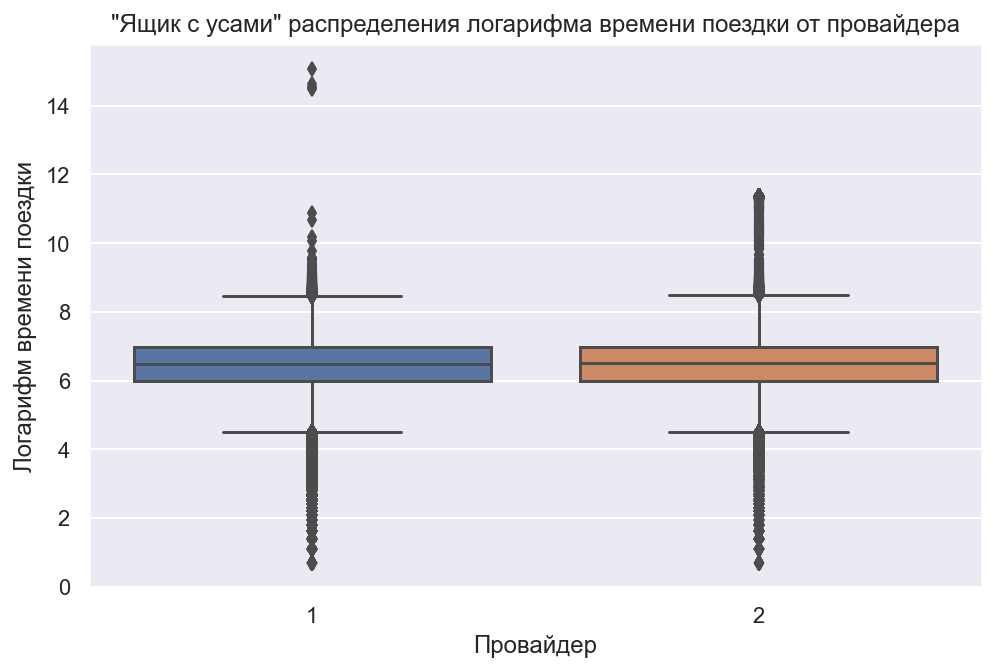

In [78]:
sns.boxplot(x='vendor_id', y="log_trip_duration", data=data)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title('"Ящик с усами" распределения логарифма времени поездки от провайдера')
plt.ylabel("Логарифм времени поездки")
plt.xlabel("Провайдер")

plt.show()

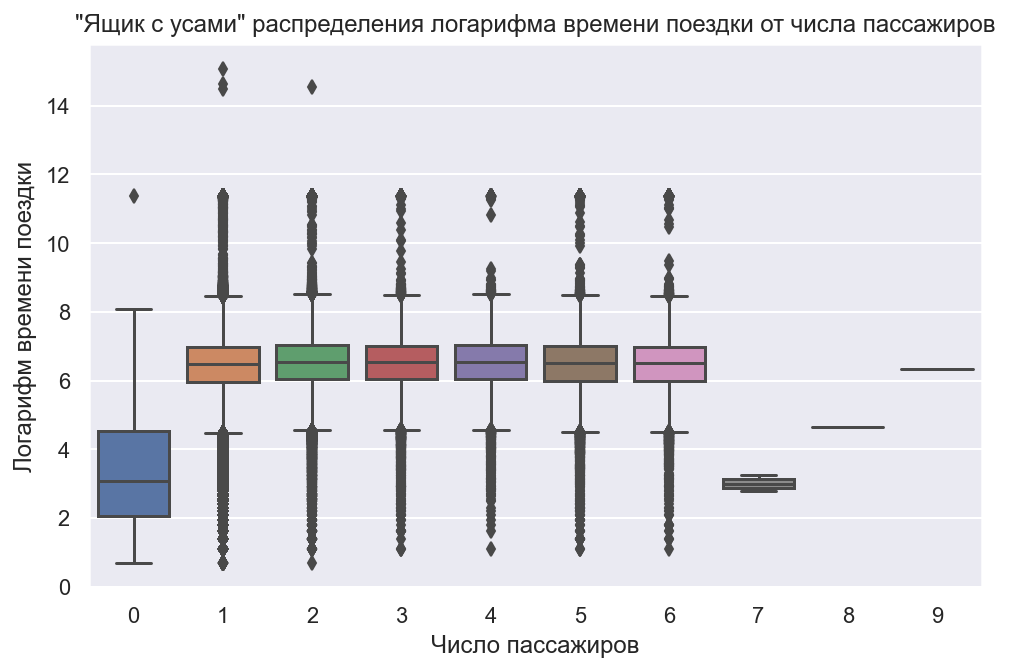

In [79]:
sns.boxplot(x='passenger_count', y="log_trip_duration", data=data)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title('"Ящик с усами" распределения логарифма времени поездки от числа пассажиров')
plt.ylabel("Логарифм времени поездки")
plt.xlabel("Число пассажиров")

plt.show()

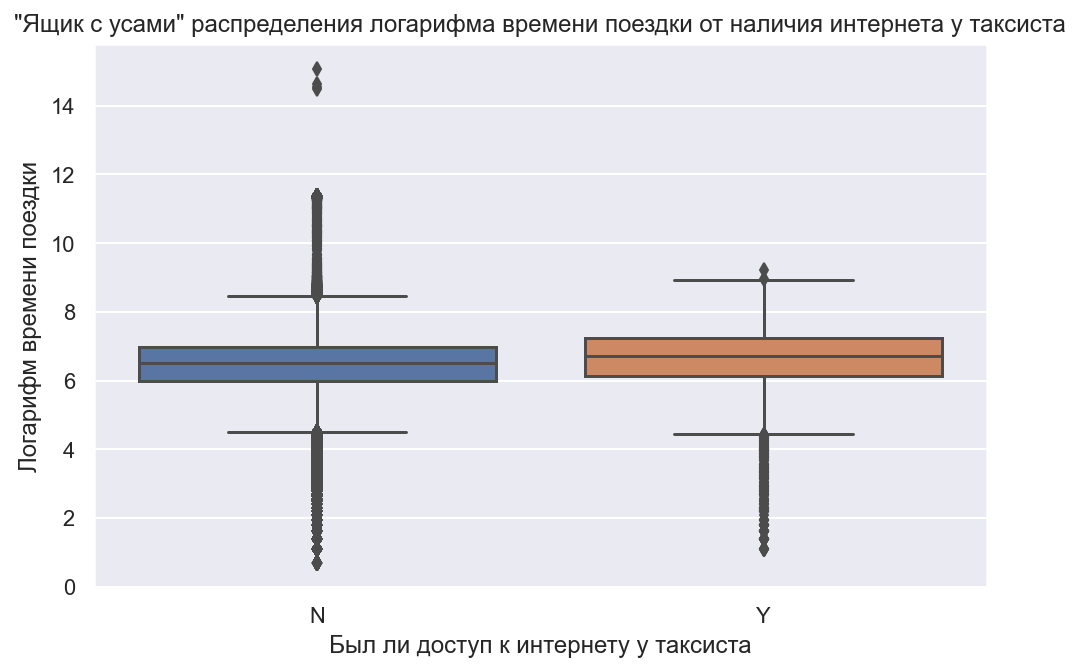

In [80]:
sns.boxplot(x='store_and_fwd_flag', y="log_trip_duration", data=data)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title('"Ящик с усами" распределения логарифма времени поездки от наличия интернета у таксиста')
plt.ylabel("Логарифм времени поездки")
plt.xlabel("Был ли доступ к интернету у таксиста")

plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

**Решение.** В `vendor_id` одна из переменных уже имеет значение 1. Осталось заменить 2 на 0. В другой заменим булевы знаечния соответствующим образом.

In [81]:
data['vendor_id'].replace(2, 0, inplace = True)

data['store_and_fwd_flag'].replace('N', 1, inplace = True)
data['store_and_fwd_flag'].replace('Y', 0, inplace = True)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ:** мы можем заметить, что на всех "ящиках с усами" много выбросов. Однако наша метрика, как обсуждалось ранее, сильно штрафует за выбросы и аномально низкие значения, которые тоже много, как видно из построенных графиков. Таким образом, веса у данных признаков будут маленькими $\Rightarrow$ эти признаки не будет сильными.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

**Решение.** Воспользуюсь пайплайном из части 1. В `categorical_features` новые признаки добавлять не буду, поскольку они и так уже бинарные.

In [82]:
train, test = train_test_split(data, test_size=0.3, random_state=10)

X_train = train[['weekday', 'month', 'hour', 'dayofyear', 'jan_anomaly', 'may_anomaly',
                'high_traffic', 'low_traffic', 'jfk_started', 'newark_started', 'jfk_ended', 
                 'newark_ended', 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                 'passenger_count', 'start_circle', 'end_circle']]
y_train = train["log_trip_duration"]

X_test = test[['weekday', 'month', 'hour', 'dayofyear', 'jan_anomaly', 'may_anomaly', 
               'high_traffic', 'low_traffic', 'jfk_started', 'newark_started', 'jfk_ended', 
               'newark_ended', 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                'passenger_count', 'start_circle', 'end_circle']]
y_test = test["log_trip_duration"]

In [83]:
numeric_features = ['dayofyear', 'log_haversine']
categorical_features = ['weekday', 'month', 'hour']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.5003


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**Решение.** Они его как-то не дали, но ладно, пусть останутся.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

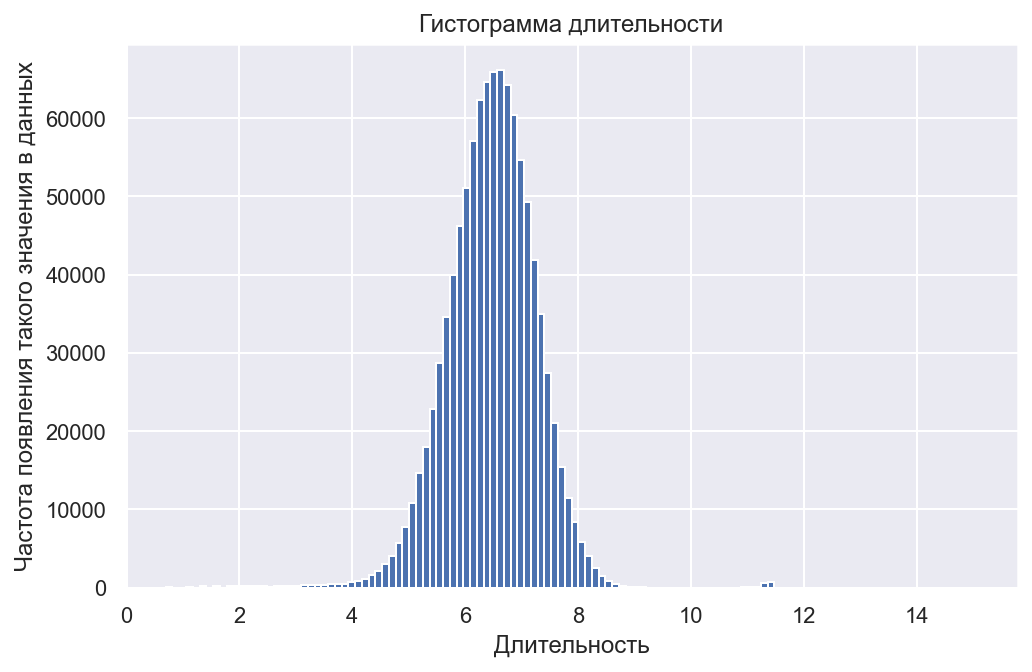

In [84]:
plt.hist(train["log_trip_duration"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма длительности")
plt.xlabel("Длительность")
plt.ylabel("Частота появления такого значения в данных")

plt.show()

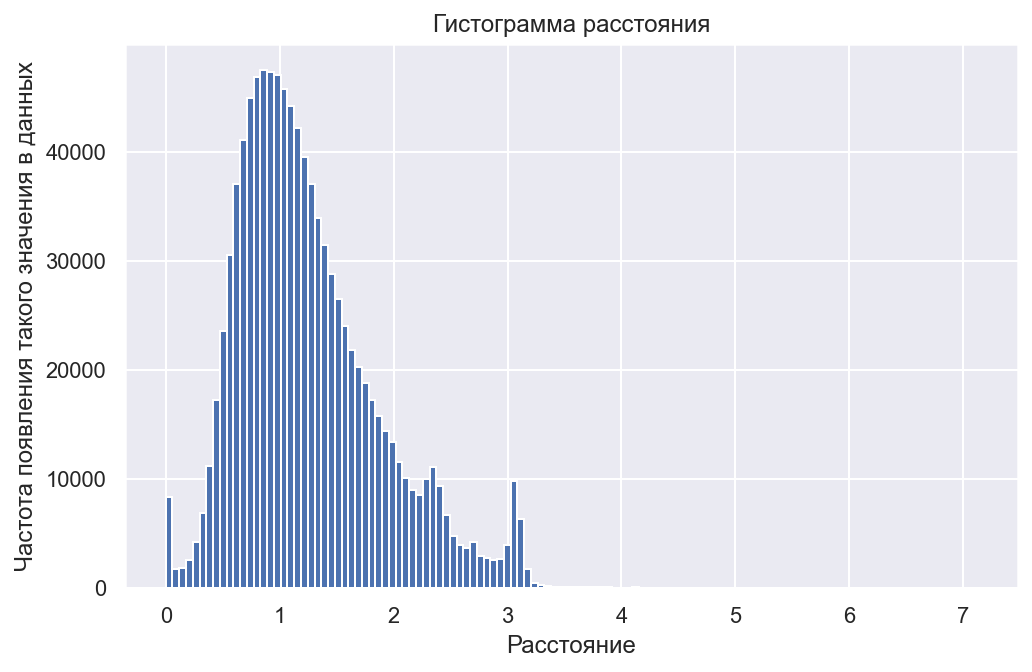

In [85]:
plt.hist(train["log_haversine"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма расстояния")
plt.xlabel("Расстояние")
plt.ylabel("Частота появления такого значения в данных")

plt.show()

<ipython-input-86-6a20d5003f09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["remainder"] = (train["log_trip_duration"] - model.predict(X_train))


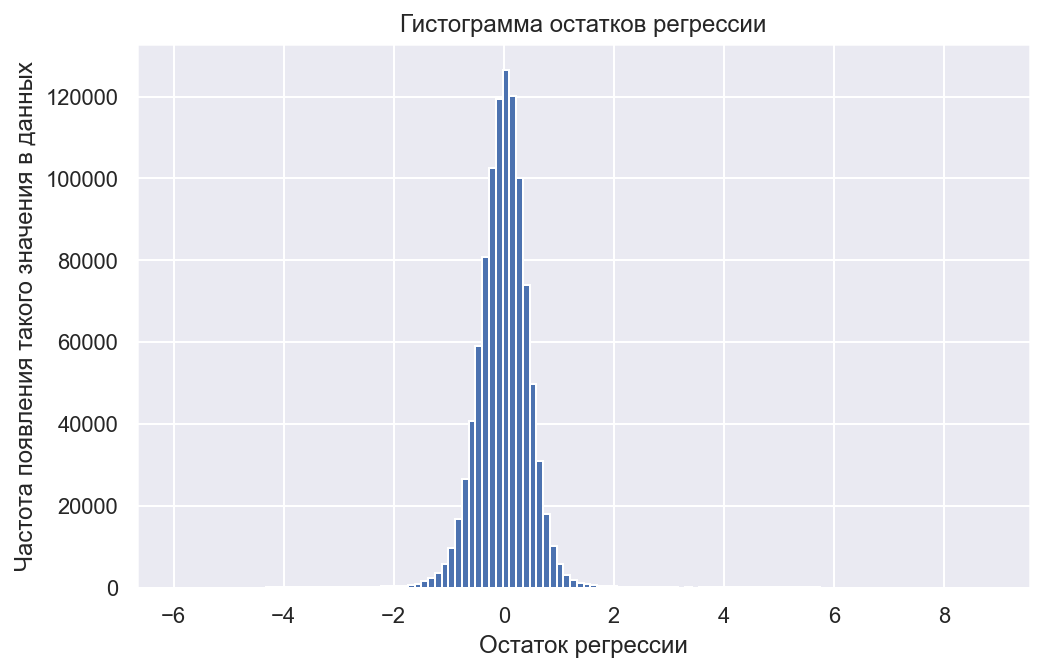

In [86]:
train["remainder"] = (train["log_trip_duration"] - model.predict(X_train))

plt.hist(train["remainder"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма остатков регрессии")
plt.xlabel("Остаток регрессии")
plt.ylabel("Частота появления такого значения в данных")

plt.show()

Гистограммы построены. Удалим выбросы по правилу $1,5 \cdot IQR$.

In [87]:
Q1 = np.percentile(train["log_haversine"], 25) 
Q3 = np.percentile(train["log_haversine"], 75) 
IQR = Q3 - Q1 

outliers = train[(train["log_haversine"] < Q1 - 1.5 * IQR ) | (train["log_haversine"] > Q3 + 1.5 * IQR)].index

train = train.drop(outliers)

In [88]:
Q1 = np.percentile(train["log_trip_duration"], 25) 
Q3 = np.percentile(train["log_trip_duration"], 75) 
IQR = Q3 - Q1 

outliers = train[(train["log_trip_duration"] < Q1 - 1.5 * IQR ) | (train["log_trip_duration"] > Q3 + 1.5 * IQR)].index

train = train.drop(outliers)

In [89]:
Q1 = np.percentile(train["remainder"], 25) 
Q3 = np.percentile(train["remainder"], 75) 
IQR = Q3 - Q1 

outliers = train[(train["remainder"] < Q1 - 1.5 * IQR ) | (train["remainder"] > Q3 + 1.5 * IQR)].index

train = train.drop(outliers)

Посмотрим теперь на гистограммы.

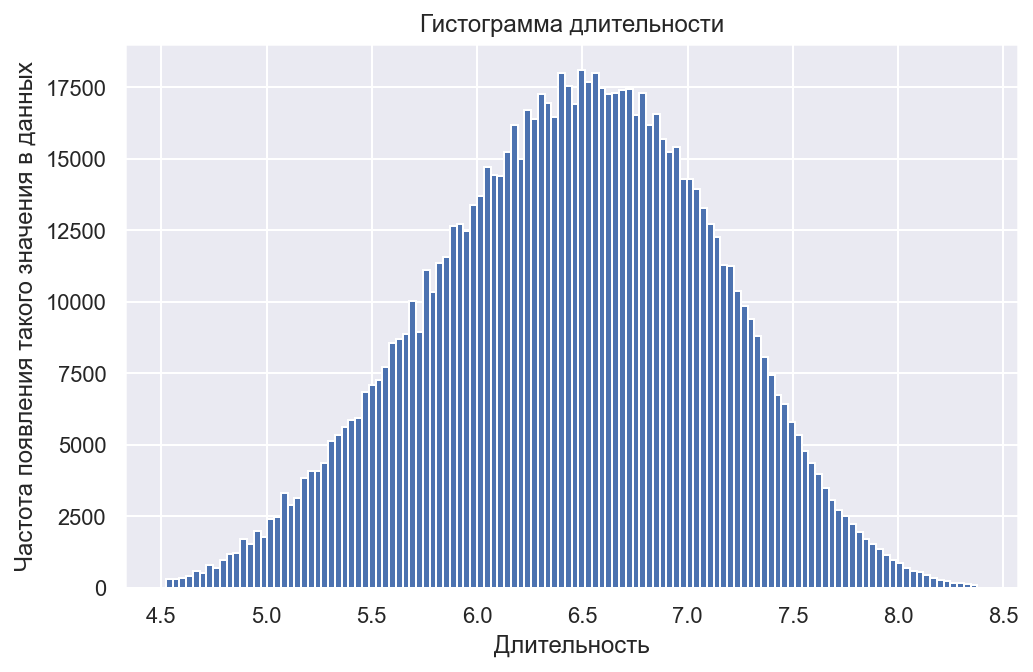

In [90]:
plt.hist(train["log_trip_duration"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма длительности")
plt.xlabel("Длительность")
plt.ylabel("Частота появления такого значения в данных")

plt.show()

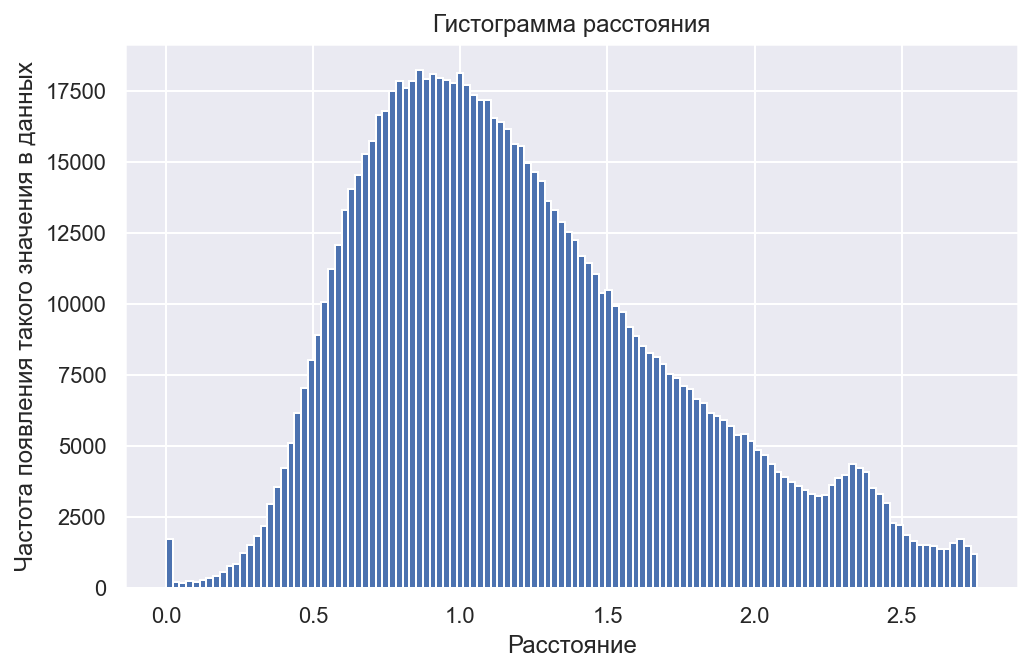

In [91]:
plt.hist(train["log_haversine"].values, bins=120)

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"] = 12
sns.set_style("darkgrid")

plt.title("Гистограмма расстояния")
plt.xlabel("Расстояние")
plt.ylabel("Частота появления такого значения в данных")

plt.show()

Получилось!

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

**Решение.** Объединим `jfk_started` (путь начался в JFK Airport) и `newark_started` (путь начался в Newark Port) в `outlier_started` — путь начался в аномальной точке. Аналогично, сделаем признак `outlier_ended`

In [92]:
data["outlier_started"] = data["jfk_started"] | data["newark_started"]
data.drop(columns=["jfk_started", "newark_started"], inplace=True)

data["outlier_ended"] = data["jfk_ended"] | data["newark_ended"]
data.drop(columns=["jfk_ended", "newark_ended"], inplace=True)

Подобные вещи проделаем с `may_anomaly` и `jan_anomaly` — в любом случае, в эти дни происходило аномальное снижение значения целевой переменной, так что, быть может, надо их объединить в одну колонку `abnormal_decline`.

In [93]:
data["abnormal_decline"] = data["may_anomaly"] | data["jan_anomaly"]
data.drop(columns=["may_anomaly", "jan_anomaly"], inplace=True)

Посмотрим, что получилось!

In [94]:
data.sample(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,dayofyear,haversine,log_haversine,high_traffic,low_traffic,start_circle,end_circle,outlier_started,outlier_ended,abnormal_decline
975138,id3391222,0,2016-03-14 18:26:39,1,-73.976212,40.755638,-73.976791,40.744362,1,6.651572,...,74,1.254812,0.813067,False,False,0,0,False,False,False
800947,id2098947,1,2016-03-15 11:40:49,1,-73.992851,40.723461,-74.002014,40.719223,1,5.926926,...,75,0.904635,0.644290,True,False,0,0,False,False,False


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Решение.** Воспользуюсь все тем же пайплайном.

In [95]:
train, test = train_test_split(data, test_size=0.3, random_state=10)

X_train = train[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline',
                'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
                 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                 'passenger_count', 'start_circle', 'end_circle']]
y_train = train["log_trip_duration"]

X_test = test[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline', 
               'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
               'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                'passenger_count', 'start_circle', 'end_circle']]
y_test = test["log_trip_duration"]

In [96]:
numeric_features = ['dayofyear', 'log_haversine']
categorical_features = ['weekday', 'month', 'hour']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.5003


Снова ничего не изменилось, эх!

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

После (поскольку кодировать необходимо только признаки из `categorical_features`):

In [97]:
ohe = OneHotEncoder()
ohe.fit(X_train[categorical_features])

len(ohe.get_feature_names()) - len(categorical_features) + len(['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline',
                'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
                 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                 'passenger_count', 'start_circle', 'end_circle'])

49

До:

In [98]:
len(['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline',
                'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
                 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                 'passenger_count', 'start_circle', 'end_circle'])

15

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

**Решение.** Вспомним семинар 2.

In [99]:
from sklearn.linear_model import Lasso

In [100]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 0.7943


Мы видим, что `Ridge` лучше!

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

**Решение.**

In [101]:
val, test1 = train_test_split(train, test_size=0.2, random_state=10)

X_val = val[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline',
                'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
                 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                 'passenger_count', 'start_circle', 'end_circle']]
y_val = val["log_trip_duration"]

X_test1 = test1[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline', 
               'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
               'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                'passenger_count', 'start_circle', 'end_circle']]
y_test1 = test1["log_trip_duration"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer)])

In [102]:
from sklearn.model_selection import GridSearchCV

`Ridge`:

Best alpha = 2.3357


Text(0, 0.5, 'CV score')

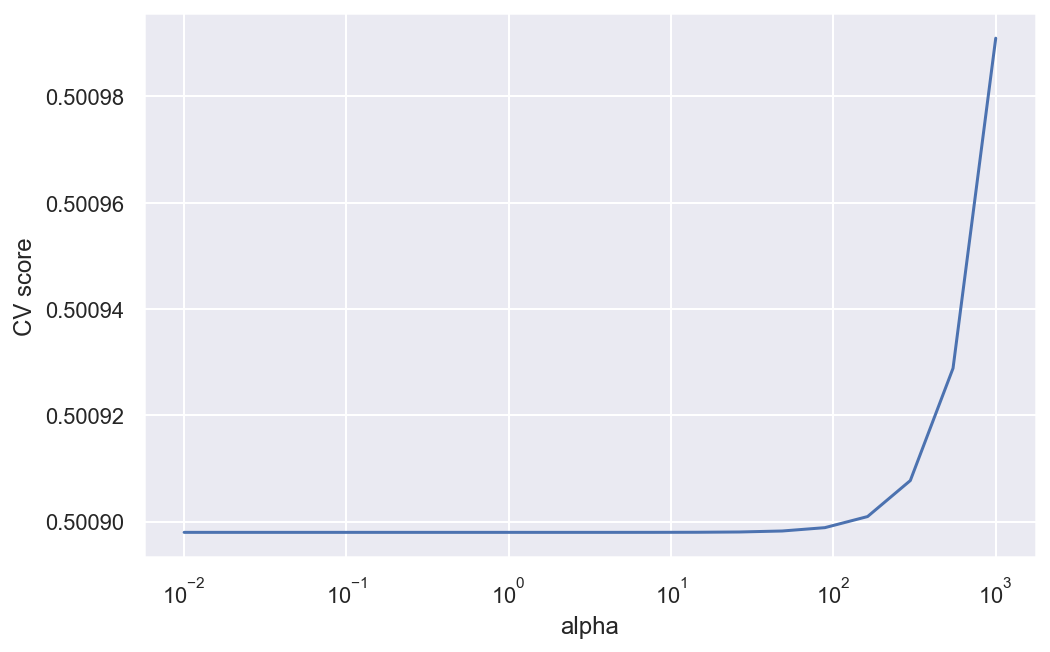

In [103]:
alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

`Lasso`:

In [ ]:
alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_val, y_val)

best_alpha1 = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Итак, коэффициенты получены. Измерим теперь качество, подставив эти числа напрямую.

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_val, y_val)
y_pred = model.predict(X_test1)
print("Test RMSE = %.4f" % mean_squared_error(y_test1, y_pred, squared=False))

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha1))
])

model = pipeline.fit(X_val, y_val)
y_pred = model.predict(X_test1)
print("Test RMSE = %.4f" % mean_squared_error(y_test1, y_pred, squared=False))

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

**Решение.** Если `count_nonzero()` считает количество ненулевых элементов, то `len(x) - np.count_nonzero(x)` посчитает количество нулевых.

In [ ]:
alphas = np.logspace(-2, 3, 20)
coefs = []

for alpha in alphas:
    model = Lasso(alpha)
    model = model.fit(X_val, y_val)
    coefs.append(len(model.coef_) - np.count_nonzero(model.coef_))

In [ ]:
plt.plot(alphas, coefs);

plt.title("График зависимости количества нулевых коэффициентов от коэффициента регуляризации")
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Количество нулевых коэффициентов")

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = 12, 8
sns.set_style("darkgrid")

Ответим на вопрос про половину признаков. Посмотрим, при каком коэффициенте регуляризации не меньше половины признаков зануляется.

In [ ]:
np.array(coefs) >= len(model.coef_) / 2

Получается, надо выкинуть из рассмотрения самый первый коэффициент `Lasso`-регрессии в списке `alphas`. Как видно по графику, наименьшие потери будут на минимальном коэффициенте из списка. Вспомним, что наилучшим показателем `RMSE` был 0.5003 на `Ridge`-регрессии. Тогда вычтем из полученной на `Lasso(best_alpha2)` оценки `RMSE` 0.5003.

In [ ]:
best_alpha2 = alphas[1:].min()
best_rmse = 0.5003

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha2))
])

model = pipeline.fit(X_val, y_val)
y_pred = model.predict(X_test1)

print(mean_squared_error(y_test1, y_pred, squared=False) -  best_rmse)

Потери невелики!

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Решение.** Вспомним [`groupby`](https://stackoverflow.com/questions/54204653/how-can-i-get-the-most-popular-item-in-a-group-in-pandas) снова. Из-за удаления данных из `train` в предыдущих задачах необходимо сбросить индекс в этой табличке.

In [ ]:
top_100 = train.groupby(["start_circle", "end_circle"])["end_circle"].agg(['count']).reset_index().sort_values('count', ascending=0).head(100)
train = train.reset_index()

In [ ]:
train["top_100"] = -1
train.loc[top_100.index.sort_values(), "top_100"] = top_100["count"].values

**Ответ на вопрос.** Такой признак может оказаться полезным для прогнозирования длины поездки, поскольку сделает ее менее устойчивой к выбросам. Действительно, для наиболее типичных поездок мы очень большое значение частоты этих поездок еще и умножаем на какой-то коэффициент. За отклоняющиеся от наиболее типичных поездки этот коэффициент будет умножаться на -1, становясь штрафом. Таким образом, это сделает нашу модель еще более устойчивой к выбросам и поможет еще лучше предсказать длину поездки для среднего потребителя услуг такси.

Самостоятельно вытащить не сможет, поскольку эти признаки совершенно никакой информации не дают о том, насколько популярны такие пары ячеек, поэтому линйеная модель не сможет сама начать назначать штрафы за непопулярные пары.

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
train1, test1 = train_test_split(train, test_size=0.3, random_state=10)

X_train = train1[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline',
                'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
                 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                 'passenger_count', 'start_circle', 'end_circle', 'top_100']]
y_train = train1["log_trip_duration"]

X_test = test1[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline', 
               'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
               'log_haversine', 'vendor_id', 'store_and_fwd_flag', 
                'passenger_count', 'start_circle', 'end_circle', 'top_100']]
y_test = test1["log_trip_duration"]

In [ ]:
numeric_features = ['dayofyear', 'log_haversine']
categorical_features = ['weekday', 'month', 'hour', 'top_100']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Стало еще лучше, прекрасно!

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

**Ответ.** Согласно [википедии](https://ru.wikipedia.org/wiki/Расстояние_городских_кварталов), манхэттенское расстояние — это метрика, введённая Германом Минковским. Согласно этой метрике, расстояние между двумя точками равно сумме модулей разностей их координат. Там же написано и то, что название «манхэттенское расстояние» связано с уличной планировкой Манхэттена.

Помочь может сделать модель более реалистичной — как говорилось на 1 семинаре, манхэттенское расстояние "учитывает, что машины всё-таки не летают".

**Решение.** Вспомним семинар 1.

In [ ]:
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

In [ ]:
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

In [ ]:
train["log_manhattan"] = np.log1p(train["distance_dummy_manhattan"])

In [ ]:
correlations = train[["distance_dummy_manhattan", "log_manhattan"]].corrwith(train["log_trip_duration"])
correlations

Как можно увидеть, корреляция между `log_manhattan` и таргетом больше!

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
train1, test1 = train_test_split(train, test_size=0.3, random_state=10)

X_train = train1[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline',
                'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
                 'vendor_id', 'store_and_fwd_flag', 
                 'passenger_count', 'start_circle', 'end_circle', 'top_100', 'log_manhattan']]
y_train = train1["log_trip_duration"]

X_test = test1[['weekday', 'month', 'hour', 'dayofyear', 'abnormal_decline', 
               'high_traffic', 'low_traffic', 'outlier_started', 'outlier_ended', 
               'vendor_id', 'store_and_fwd_flag', 
                'passenger_count', 'start_circle', 'end_circle', 'top_100', 'log_manhattan']]
y_test = test1["log_trip_duration"]

In [ ]:
numeric_features = ['dayofyear', 'log_manhattan']
categorical_features = ['weekday', 'month', 'hour', 'top_100']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Стало немного хуже, видимо, потому что корреляция между `log_haversine` и таргетом была совсем чуть-чуть, но выше, чем у `log_manhattan` и таргета.

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

<img src="./meme.jpg" style="width: 400px">